# ****ASSIGNMENT 12**** #

## ***NAIVE BAYES*** ##

In [409]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

### **Importing data from file SalaryData_Test.csv**

In [410]:
# Reading the data from the file 'SalaryData_Test.csv'
salary_orig_data = pd.read_csv("SalaryData_Test.csv")
salary_orig_data

age      workclass      education  educationno        maritalstatus  \
0       25        Private           11th            7        Never-married   
1       38        Private        HS-grad            9   Married-civ-spouse   
2       28      Local-gov     Assoc-acdm           12   Married-civ-spouse   
3       44        Private   Some-college           10   Married-civ-spouse   
4       34        Private           10th            6        Never-married   
...    ...            ...            ...          ...                  ...   
15055   33        Private      Bachelors           13        Never-married   
15056   39        Private      Bachelors           13             Divorced   
15057   38        Private      Bachelors           13   Married-civ-spouse   
15058   44        Private      Bachelors           13             Divorced   
15059   35   Self-emp-inc      Bachelors           13   Married-civ-spouse   

               occupation    relationship                 race      sex  \
0       Machine-op-inspct       Own-child                Black     Male   
1         Farming-fishing         Husband                White     Male   
2         Protective-serv         Husband                White     Male   
3       Machine-op-inspct         Husband                Black     Male   
4           Other-service   Not-in-family                White     Male   
...                   ...             ...                  ...      ...   
15055      Prof-specialty       Own-child                White     Male   
15056      Prof-specialty   Not-in-family                White   Female   
15057      Prof-specialty         Husband                White     Male   
15058        Adm-clerical       Own-child   Asian-Pac-Islander     Male   
15059     Exec-managerial         Husband                White     Male   

       capitalgain  capitalloss  hoursperweek          native  Salary  
0                0            0            40   United-States   <=50K  
1                0            0            50   United-States   <=50K  
2                0            0            40   United-States    >50K  
3             7688            0            40   United-States    >50K  
4                0            0            30   United-States   <=50K  
...            ...          ...           ...             ...     ...  
15055            0            0            40   United-States   <=50K  
15056            0            0            36   United-States   <=50K  
15057            0            0            50   United-States   <=50K  
15058         5455            0            40   United-States   <=50K  
15059            0            0            60   United-States    >50K  

[15060 rows x 14 columns]

### **EDA (Exploratory Data Analysis)**

In [411]:
salary_orig_data.shape

(15060, 14)

In [412]:
salary_orig_data.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

#### *Descriptive Analysis* ####

In [413]:
salary_orig_data.describe()

age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000

In [414]:
salary_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


#### *Checking for missing values*

In [415]:
# check for missing values
salary_orig_data.isna().sum() # The result shows that there are no missing values

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### *Checking for Null Values* ####

In [416]:
# Checking to see if there are any null values
# We can get this information using salary_orig_data.info() option as well
salary_orig_data.isnull().sum() # The result shows that there are no null values

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### *Checking the data structure* ####

In [417]:
# Data Structure
print(type(salary_orig_data))
salary_orig_data.shape

<class 'pandas.core.frame.DataFrame'>


(15060, 14)

In [418]:
# Checking data types
salary_orig_data.dtypes # check data types of all variables

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [419]:
# The Unique Titles in 'salary_orig_data' are:
for col in salary_orig_data.columns:
  print(f"The count of unique titles in {col} are {len(salary_orig_data[col].unique())}\n")
  print(f"The unique titles in {col} are -\n {salary_orig_data[col].unique()}\n")

The count of unique titles in age are 73

The unique titles in age are -
 [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84]

The count of unique titles in workclass are 7

The unique titles in workclass are -
 [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']

The count of unique titles in education are 16

The unique titles in education are -
 [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']

The count of unique titles in educationno are 16

The unique titles in educationno are -
 [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]

The count of unique titles in maritalstatus are 7

The unique titles in maritalstatus are -
 [

#### *Rename Columns* ####

In [420]:
salary_data = salary_orig_data.copy()

In [421]:
salary_data.head(0)

Empty DataFrame
Columns: [age, workclass, education, educationno, maritalstatus, occupation, relationship, race, sex, capitalgain, capitalloss, hoursperweek, native, Salary]
Index: []

In [422]:
# Renaming column names
salary_data.rename(columns = {'age':'AGE','workclass':'WCLASS','education':'EDU','educationno':'EDU_NO','maritalstatus':'MS','occupation':'OCCUP','relationship':'REL','race':'RACE','sex':'SEX','capitalgain':'CAP_GAIN','capitalloss':'CAP_LOSS','hoursperweek':'HPW','native':'NATIVE','Salary':'SAL'}, inplace = True)
salary_data.head()

AGE      WCLASS            EDU  EDU_NO                   MS  \
0   25     Private           11th       7        Never-married   
1   38     Private        HS-grad       9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm      12   Married-civ-spouse   
3   44     Private   Some-college      10   Married-civ-spouse   
4   34     Private           10th       6        Never-married   

                OCCUP             REL    RACE    SEX  CAP_GAIN  CAP_LOSS  HPW  \
0   Machine-op-inspct       Own-child   Black   Male         0         0   40   
1     Farming-fishing         Husband   White   Male         0         0   50   
2     Protective-serv         Husband   White   Male         0         0   40   
3   Machine-op-inspct         Husband   Black   Male      7688         0   40   
4       Other-service   Not-in-family   White   Male         0         0   30   

           NATIVE     SAL  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States    >50K  
3   United-States    >50K  
4   United-States   <=50K

In [423]:
salary_data.duplicated().sum() # There are 930 duplicates

930

In [424]:
salary_data[salary_data.duplicated()].shape

(930, 14)

In [425]:
salary_data[salary_data.duplicated()]

AGE    WCLASS            EDU  EDU_NO                   MS  \
551     59   Private        HS-grad       9             Divorced   
601     32   Private        HS-grad       9   Married-civ-spouse   
681     40   Private        HS-grad       9   Married-civ-spouse   
799     24   Private      Bachelors      13        Never-married   
1044    44   Private    Prof-school      15   Married-civ-spouse   
...    ...       ...            ...     ...                  ...   
15043   51   Private        HS-grad       9   Married-civ-spouse   
15044   22   Private   Some-college      10        Never-married   
15049   32   Private        HS-grad       9   Married-civ-spouse   
15052   31   Private        HS-grad       9   Married-civ-spouse   
15053   25   Private        HS-grad       9        Never-married   

                    OCCUP             REL    RACE      SEX  CAP_GAIN  \
551         Other-service   Not-in-family   White   Female         0   
601                 Sales         Husband   White     Male         0   
681          Craft-repair         Husband   White     Male         0   
799        Prof-specialty   Not-in-family   White     Male         0   
1044       Prof-specialty         Husband   White     Male     99999   
...                   ...             ...     ...      ...       ...   
15043        Craft-repair         Husband   White     Male         0   
15044        Craft-repair       Own-child   White     Male         0   
15049   Handlers-cleaners         Husband   White     Male         0   
15052        Craft-repair         Husband   White     Male         0   
15053       Other-service       Own-child   White   Female         0   

       CAP_LOSS  HPW          NATIVE     SAL  
551           0   40   United-States   <=50K  
601           0   40   United-States   <=50K  
681           0   40   United-States   <=50K  
799           0   35   United-States   <=50K  
1044          0   60   United-States    >50K  
...         ...  ...             ...     ...  
15043         0   40   United-States   <=50K  
15044         0   40   United-States   <=50K  
15049         0   40   United-States   <=50K  
15052         0   40   United-States   <=50K  
15053         0   40   United-States   <=50K  

[930 rows x 14 columns]

In [426]:
salary_data.shape

(15060, 14)

In [427]:
# Dropping the duplicates as well as resetting the index
salary_data = salary_data.drop_duplicates().reset_index(drop=True) # Removing the duplicates by retraining on the first record

In [428]:
salary_data.shape # After removal of 930 duplicate records from 15060 records, the remaining is 14130

(14130, 14)

In [429]:
# Print the duplicated rows. Since we don't have any duplicates it is not showing anything
salary_data[salary_data.duplicated()]

Empty DataFrame
Columns: [AGE, WCLASS, EDU, EDU_NO, MS, OCCUP, REL, RACE, SEX, CAP_GAIN, CAP_LOSS, HPW, NATIVE, SAL]
Index: []

#### *Segregating the columns into Numeric and Non-Numeric* ####

In [430]:
categorical_cols = []
numeric_cols = []
for columns in salary_data.columns:
      if salary_data[columns].dtypes == 'object':
            categorical_cols.append(columns)
            print(f"There are {len(salary_data[columns].unique())} unique values in the categorical column name '{columns}'")
      elif salary_data[columns].dtypes == 'int64':
            numeric_cols.append(columns)

print("\nThe categorical columns are: ",categorical_cols,"\n")
print("The numeric columns are: ",numeric_cols,"\n")

There are 7 unique values in the categorical column name 'WCLASS'
There are 16 unique values in the categorical column name 'EDU'
There are 7 unique values in the categorical column name 'MS'
There are 14 unique values in the categorical column name 'OCCUP'
There are 6 unique values in the categorical column name 'REL'
There are 5 unique values in the categorical column name 'RACE'
There are 2 unique values in the categorical column name 'SEX'
There are 40 unique values in the categorical column name 'NATIVE'
There are 2 unique values in the categorical column name 'SAL'

The categorical columns are:  ['WCLASS', 'EDU', 'MS', 'OCCUP', 'REL', 'RACE', 'SEX', 'NATIVE', 'SAL'] 

The numeric columns are:  ['AGE', 'EDU_NO', 'CAP_GAIN', 'CAP_LOSS', 'HPW'] 



In [431]:
# Decide which categorical variables you want to use in model
for columns in salary_data.columns:
    if salary_data[columns].dtypes == 'object':
        unique_count = len(salary_data[columns].unique())
        print("\n------------------------------------------\n")
        print(f"There are {unique_count} unique columns in the column name '{columns}'")
        print("\n", salary_data[columns].value_counts(),"\n")


------------------------------------------

There are 7 unique columns in the column name 'WCLASS'

 WCLASS
 Private             10138
 Self-emp-not-inc     1279
 Local-gov            1017
 State-gov             664
 Self-emp-inc          565
 Federal-gov           460
 Without-pay             7
Name: count, dtype: int64 


------------------------------------------

There are 16 unique columns in the column name 'EDU'

 EDU
 HS-grad         4473
 Some-college    3014
 Bachelors       2369
 Masters          864
 Assoc-voc        634
 11th             542
 Assoc-acdm       493
 10th             395
 7th-8th          265
 Prof-school      241
 9th              219
 12th             194
 Doctorate        168
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: count, dtype: int64 


------------------------------------------

There are 7 unique columns in the column name 'MS'

 MS
 Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2

In [432]:
salary_data[numeric_cols].head()

AGE  EDU_NO  CAP_GAIN  CAP_LOSS  HPW
0   25       7         0         0   40
1   38       9         0         0   50
2   28      12         0         0   40
3   44      10      7688         0   40
4   34       6         0         0   30

In [433]:

salary_data[categorical_cols].head()

WCLASS            EDU                   MS               OCCUP  \
0     Private           11th        Never-married   Machine-op-inspct   
1     Private        HS-grad   Married-civ-spouse     Farming-fishing   
2   Local-gov     Assoc-acdm   Married-civ-spouse     Protective-serv   
3     Private   Some-college   Married-civ-spouse   Machine-op-inspct   
4     Private           10th        Never-married       Other-service   

              REL    RACE    SEX          NATIVE     SAL  
0       Own-child   Black   Male   United-States   <=50K  
1         Husband   White   Male   United-States   <=50K  
2         Husband   White   Male   United-States    >50K  
3         Husband   Black   Male   United-States    >50K  
4   Not-in-family   White   Male   United-States   <=50K

In [434]:
cat_sal_data = pd.DataFrame()
num_sal_data = pd.DataFrame()

cat_sal_data = salary_data[categorical_cols]
num_sal_data = salary_data[numeric_cols]

In [435]:
cat_sal_data.head()

WCLASS            EDU                   MS               OCCUP  \
0     Private           11th        Never-married   Machine-op-inspct   
1     Private        HS-grad   Married-civ-spouse     Farming-fishing   
2   Local-gov     Assoc-acdm   Married-civ-spouse     Protective-serv   
3     Private   Some-college   Married-civ-spouse   Machine-op-inspct   
4     Private           10th        Never-married       Other-service   

              REL    RACE    SEX          NATIVE     SAL  
0       Own-child   Black   Male   United-States   <=50K  
1         Husband   White   Male   United-States   <=50K  
2         Husband   White   Male   United-States    >50K  
3         Husband   Black   Male   United-States    >50K  
4   Not-in-family   White   Male   United-States   <=50K

In [436]:
num_sal_data.head()

AGE  EDU_NO  CAP_GAIN  CAP_LOSS  HPW
0   25       7         0         0   40
1   38       9         0         0   50
2   28      12         0         0   40
3   44      10      7688         0   40
4   34       6         0         0   30

### **Visualizations** ###

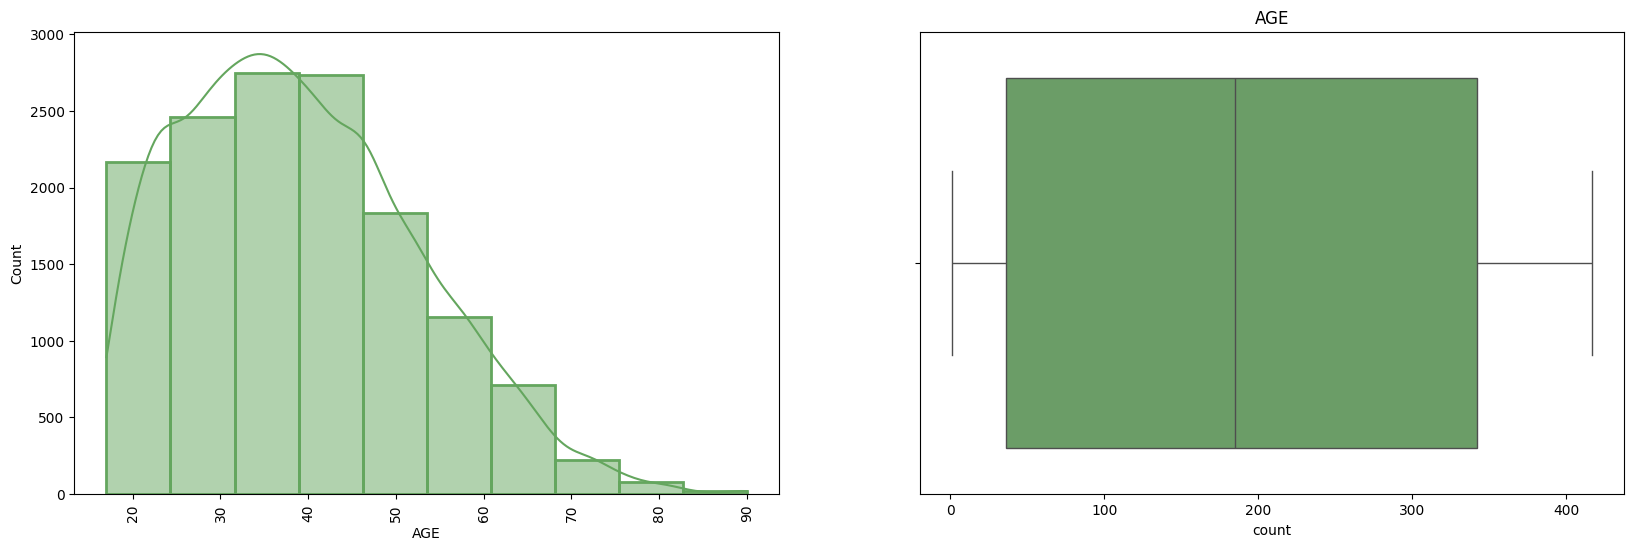

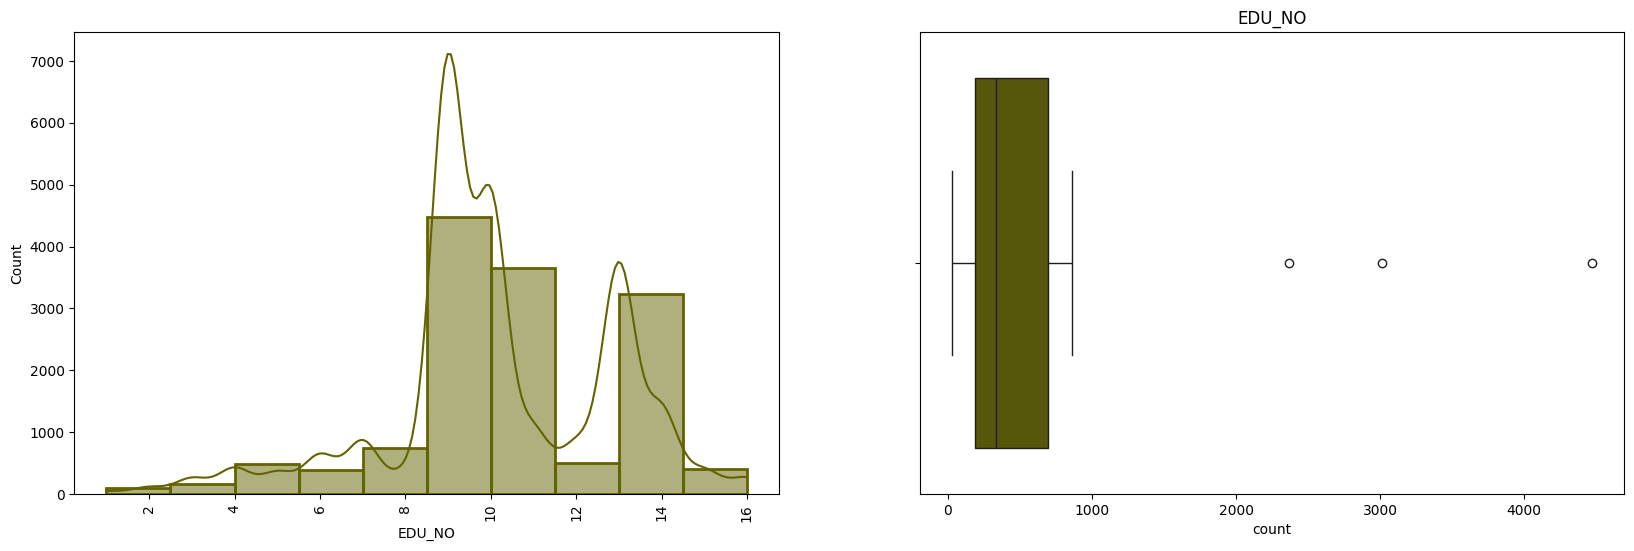

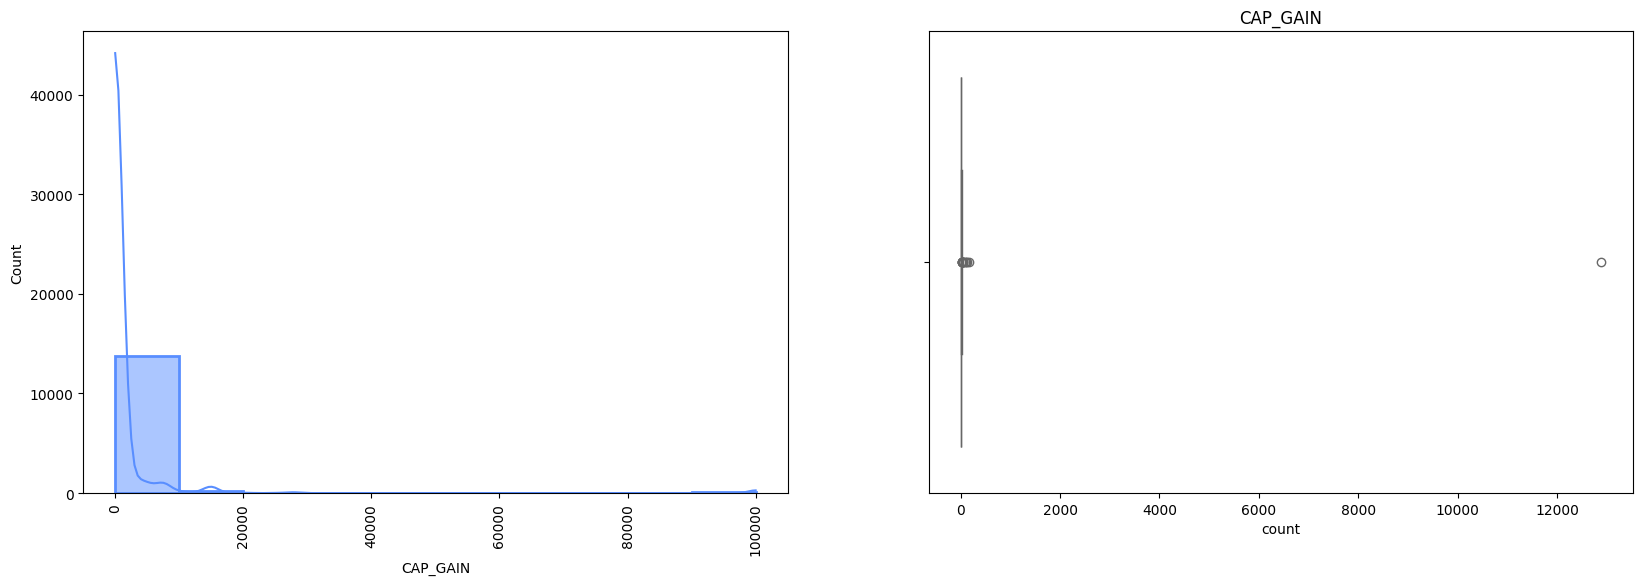

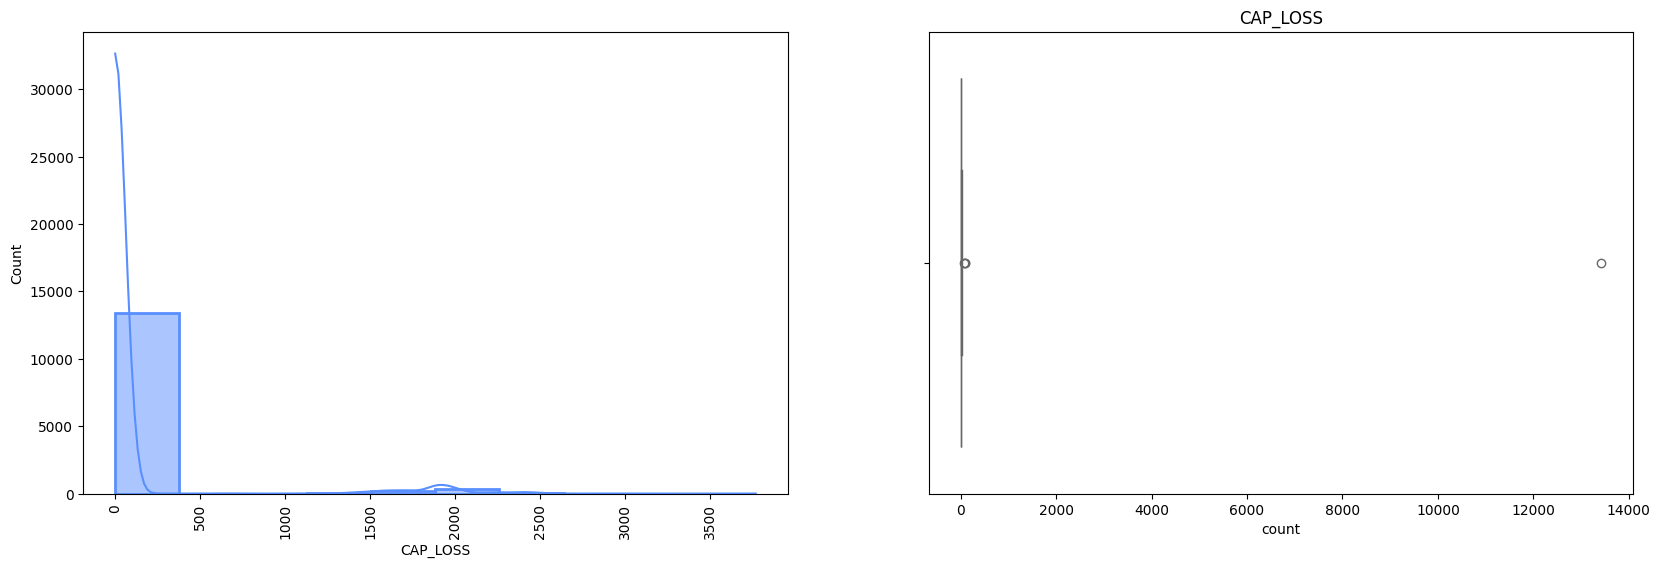

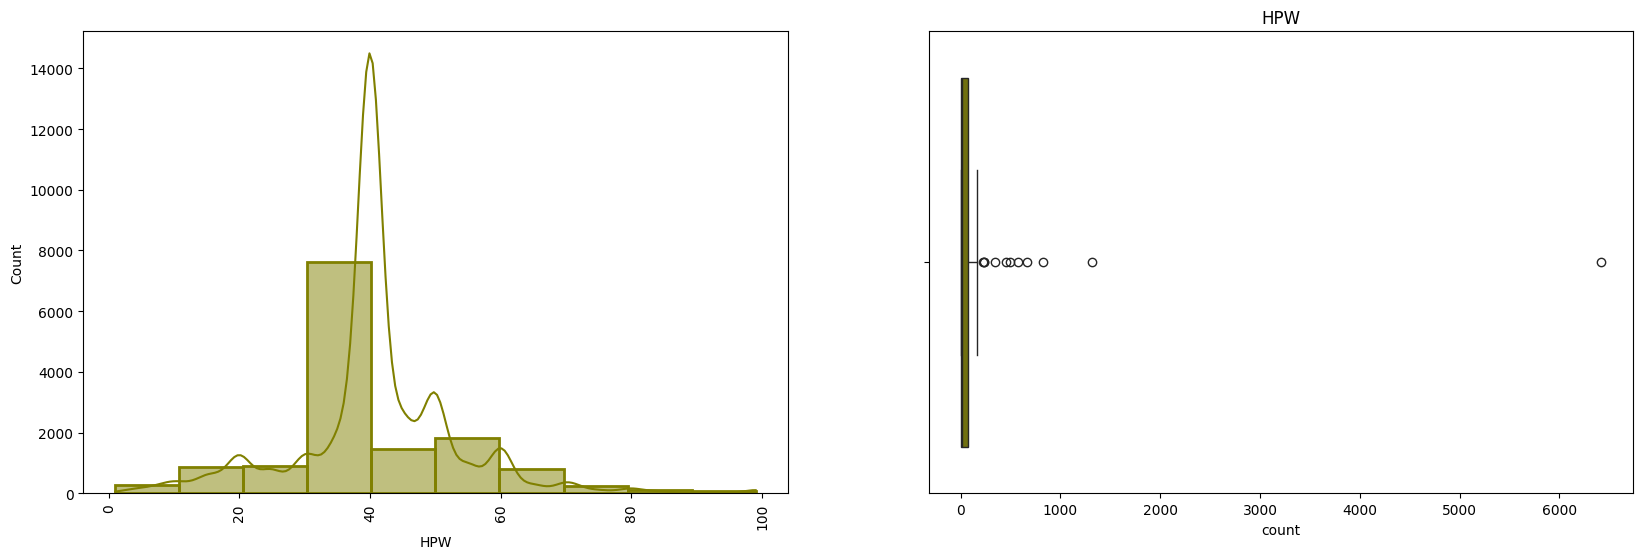

In [437]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)

for n_cols in num_sal_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(num_sal_data,n_cols)
    plt.title(n_cols)

There are  too many outliers and we cannot remove them as they are important for the model building.

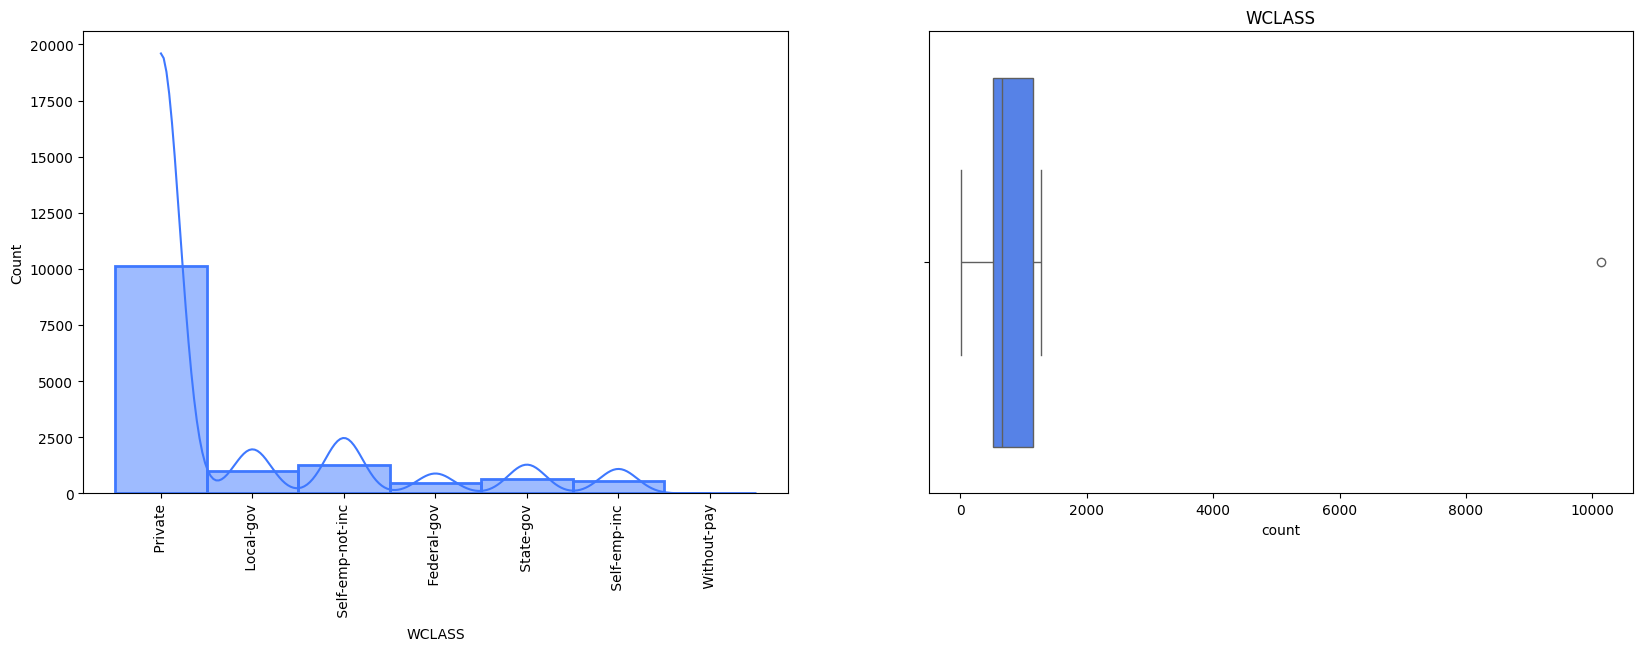

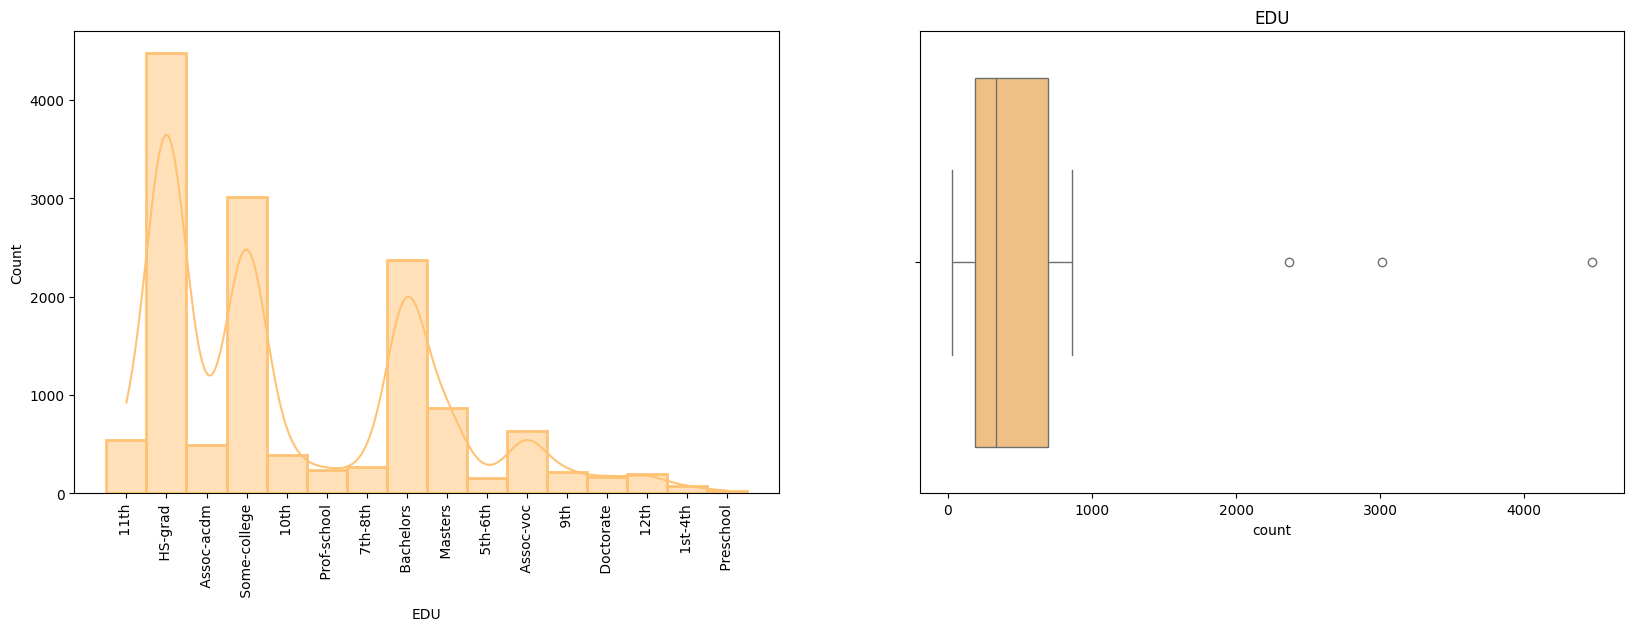

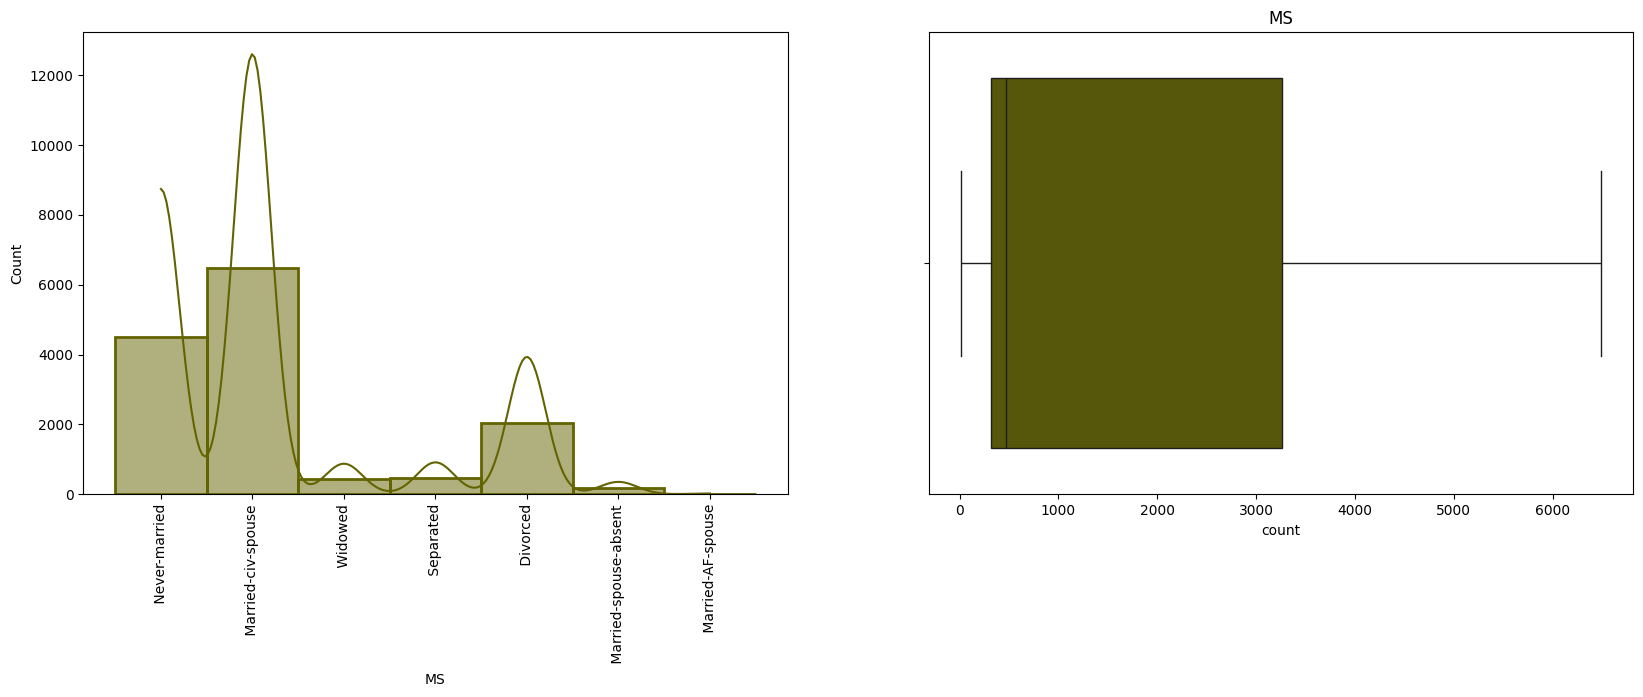

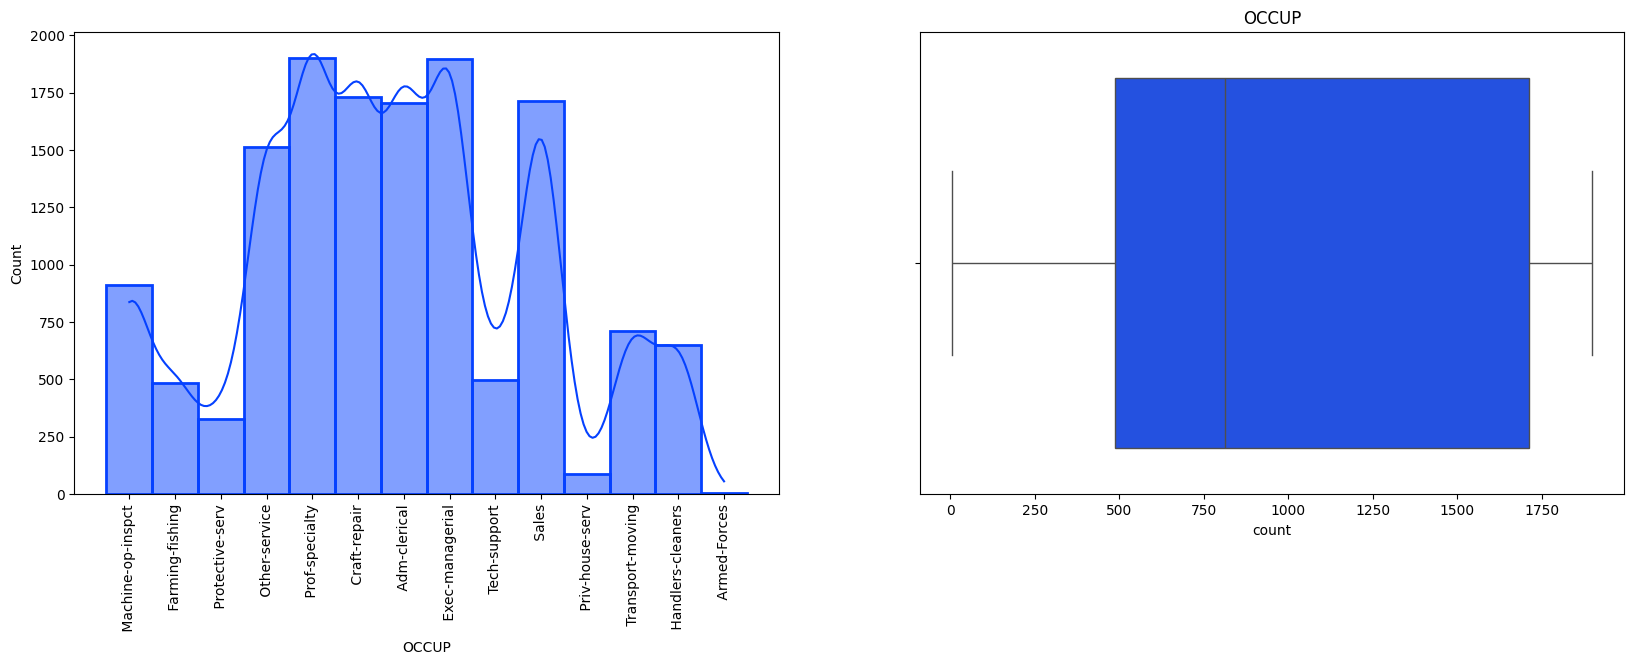

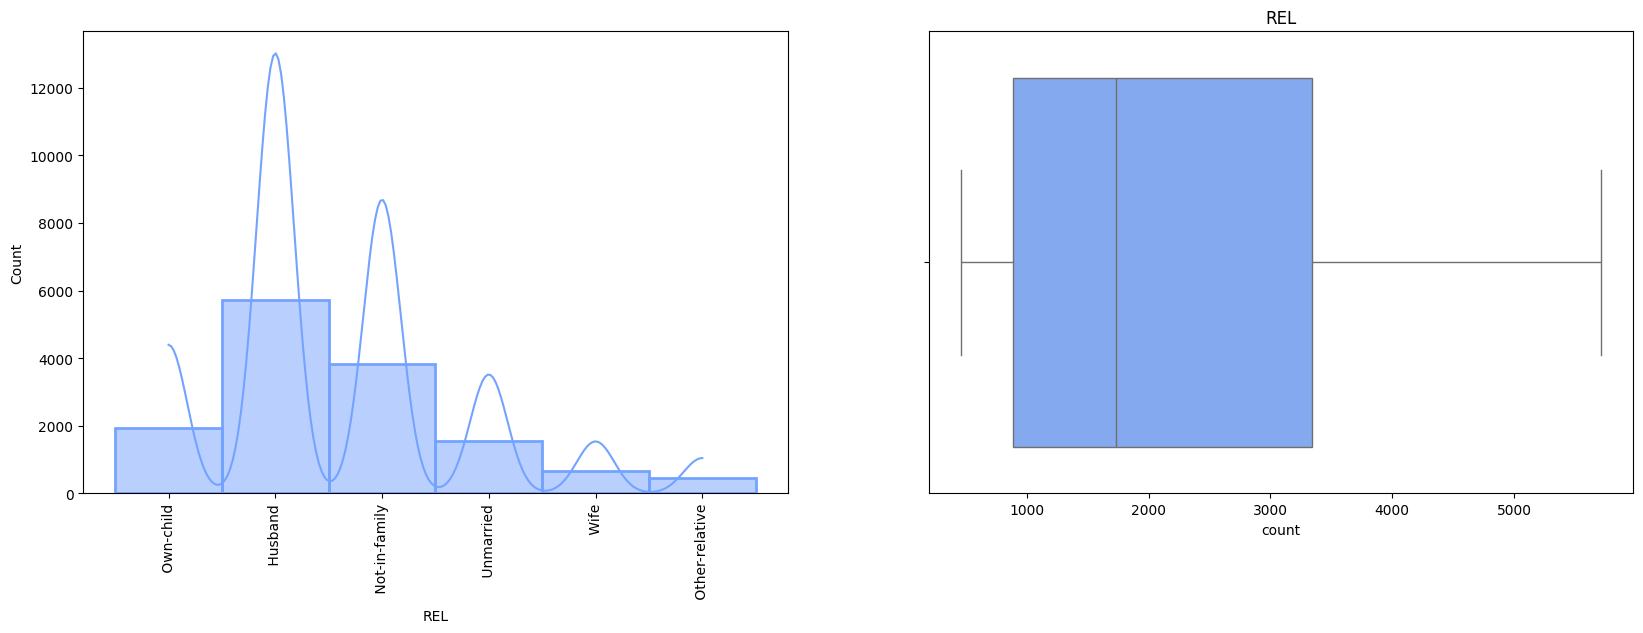

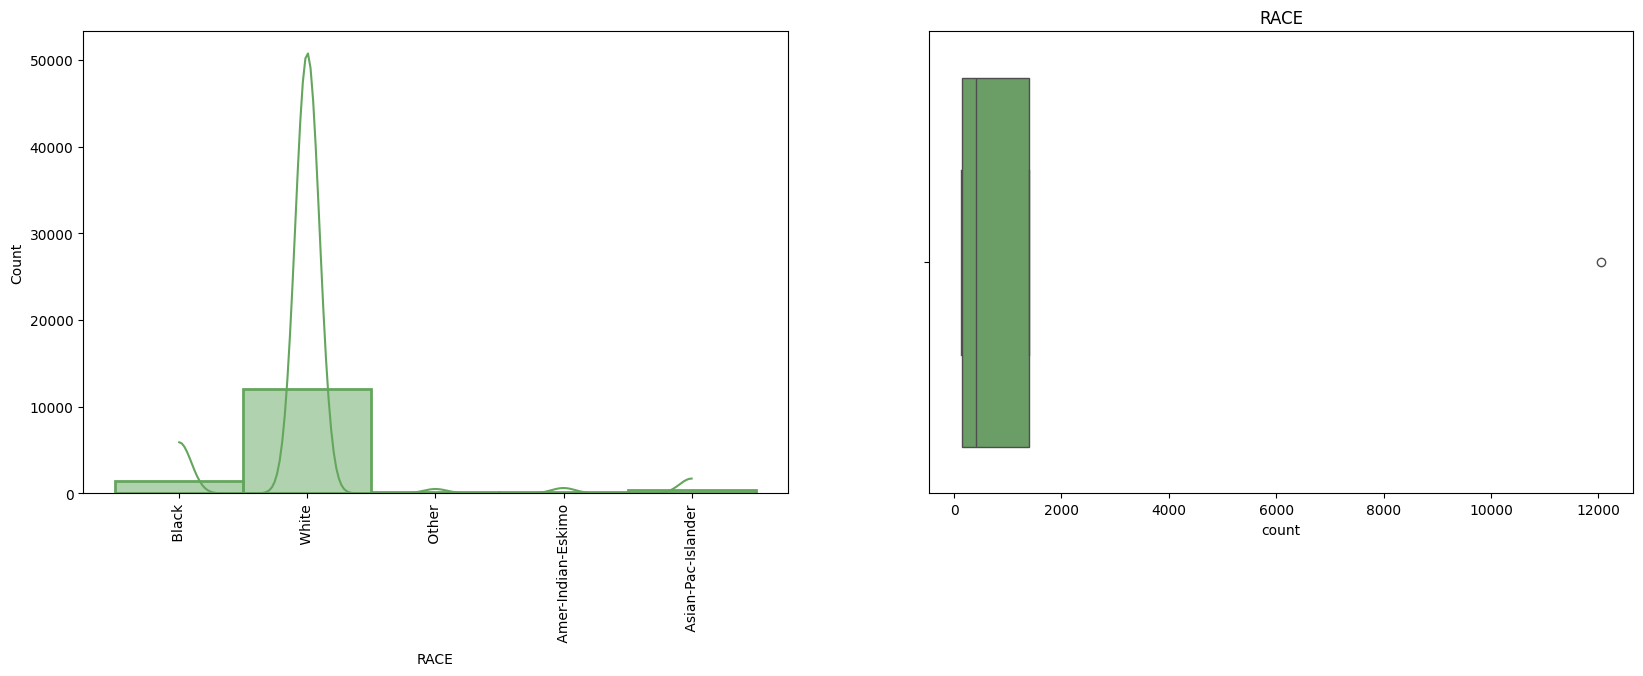

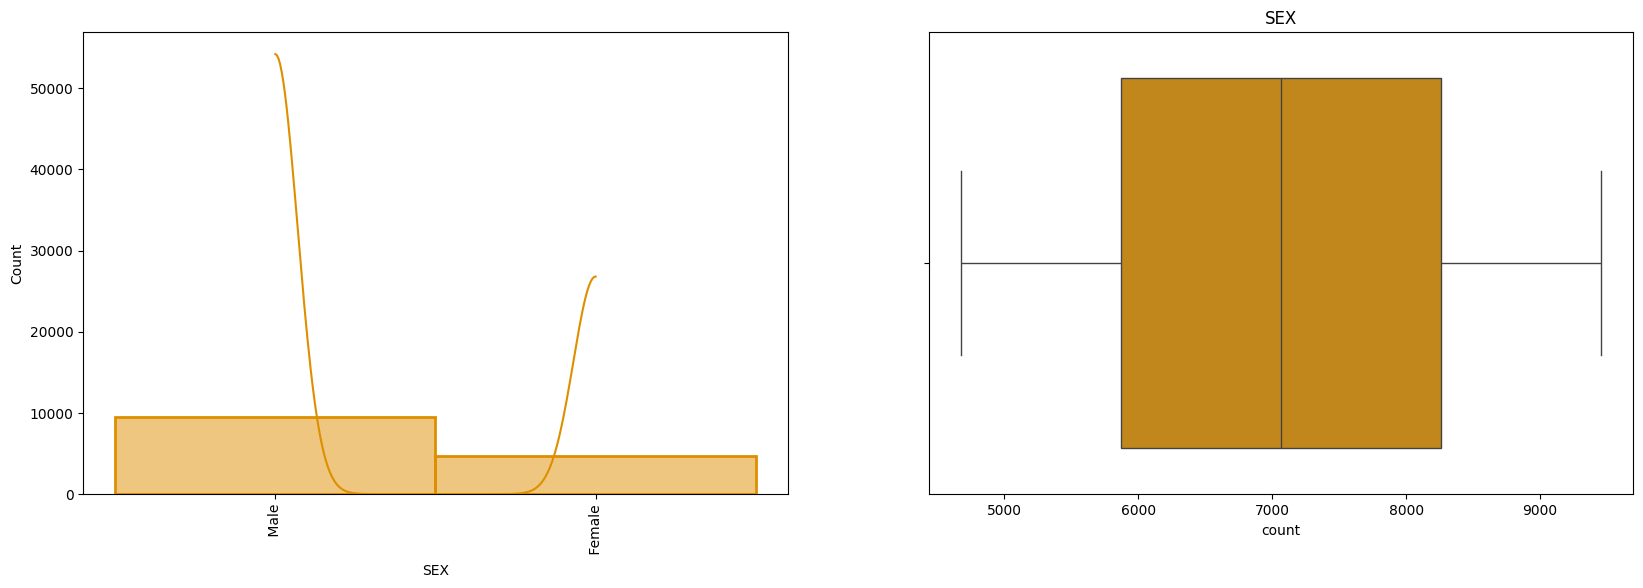

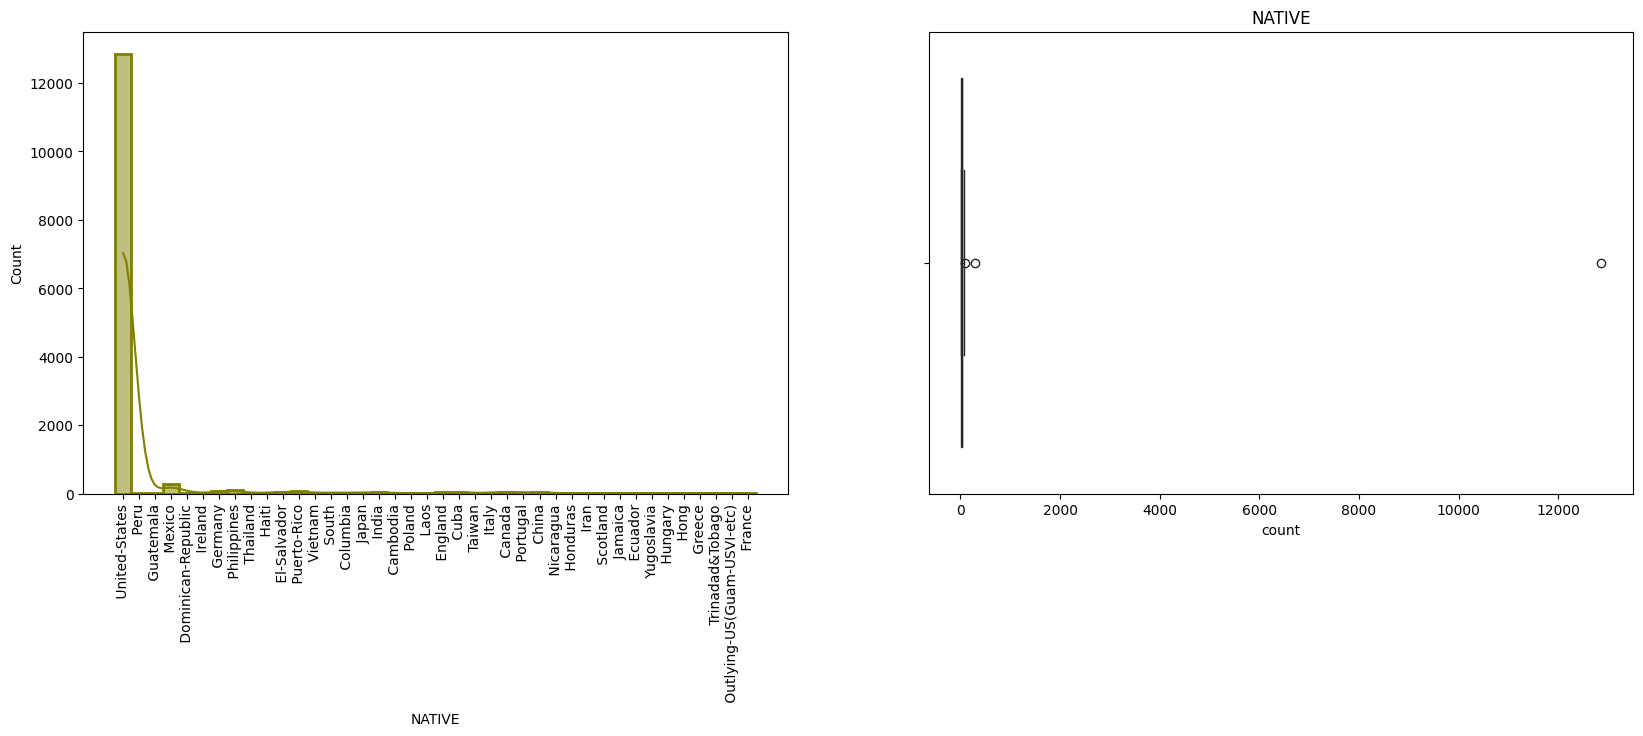

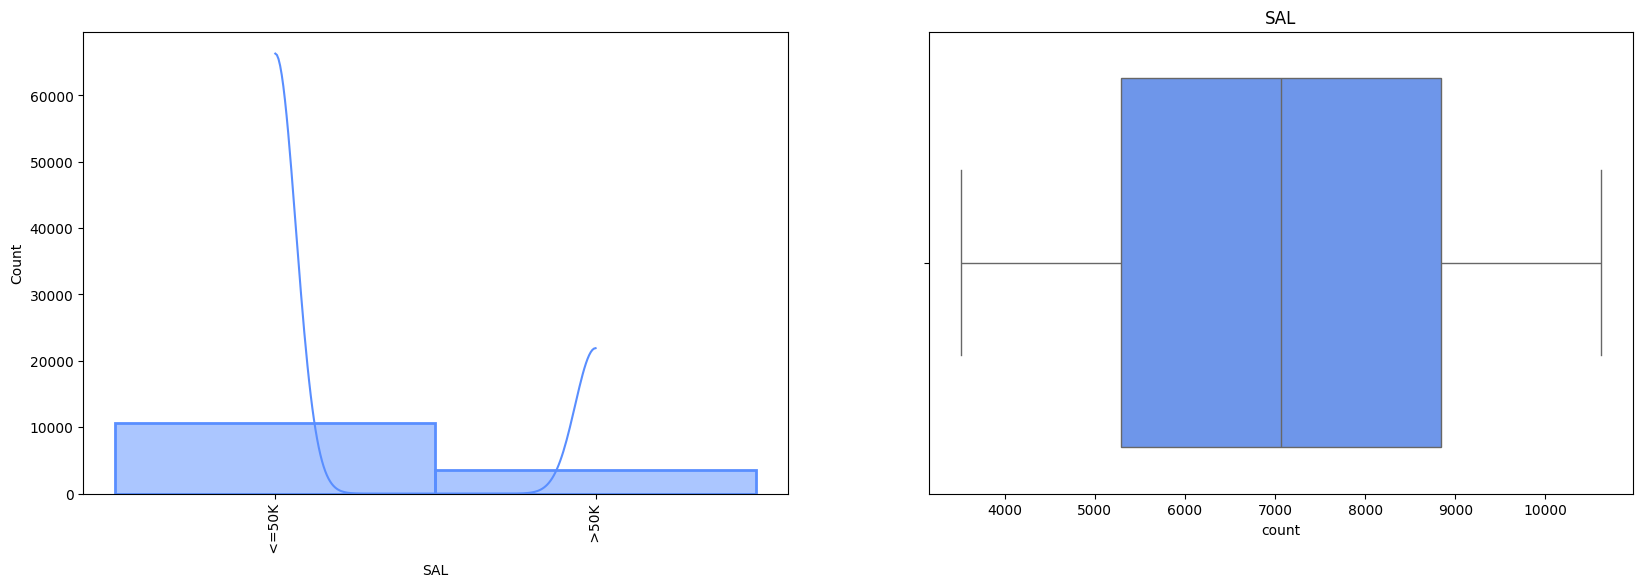

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    plot = sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)
    plt.setp(plot.get_xticklabels(), rotation=90)

    plt.subplot(1,2,2)
    sns.boxplot(x=data[feature].value_counts(), color=color)

for c_cols in cat_sal_data:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(cat_sal_data,c_cols)
    plt.title(c_cols)

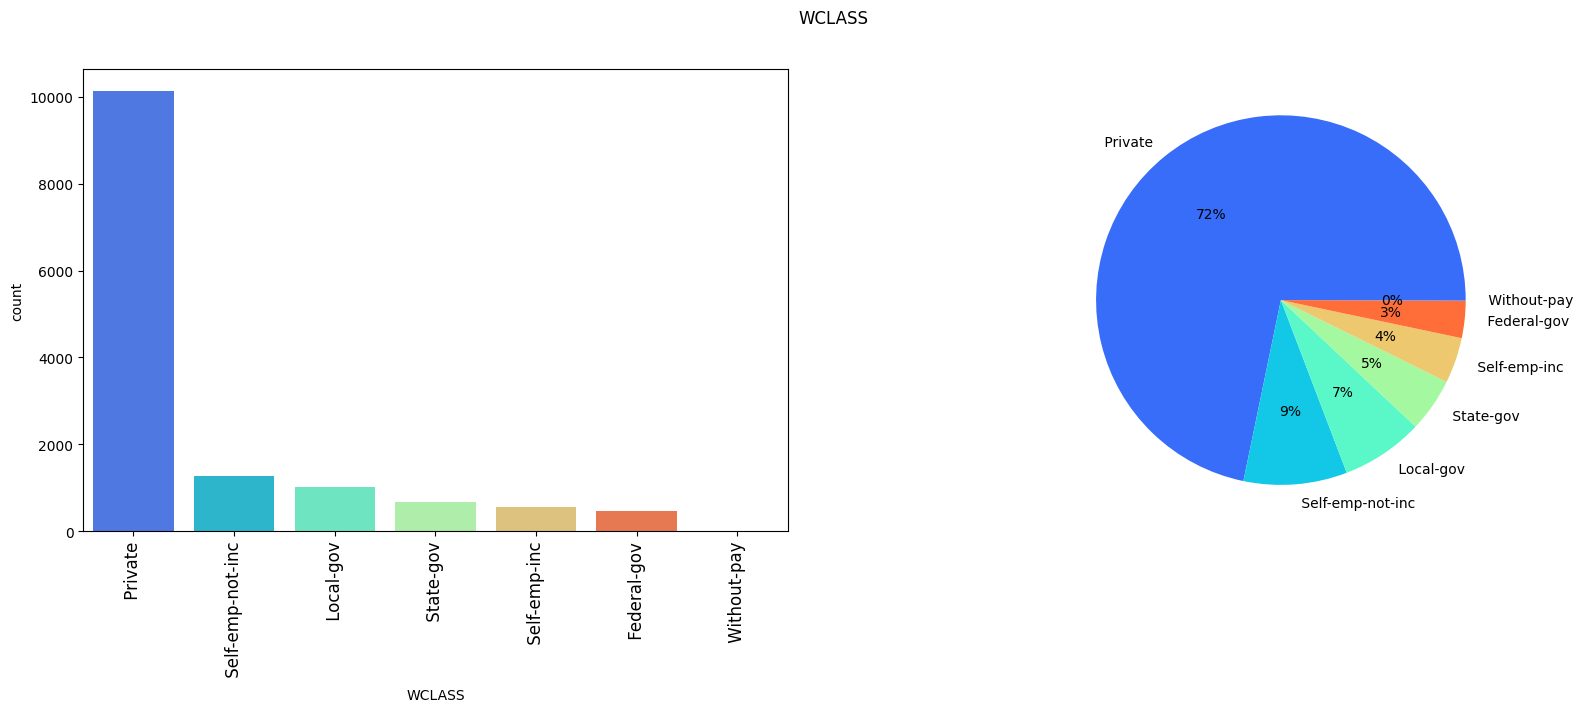

In [439]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='WCLASS', data=cat_sal_data, palette = palette_color, order=cat_sal_data['WCLASS'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['WCLASS'].value_counts().keys().tolist()
counts = cat_sal_data['WCLASS'].value_counts().tolist()
plt.pie(cat_sal_data['WCLASS'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('WCLASS')

plt.show()

The highest working class is for Private employes followed by Self employed not incorporation.

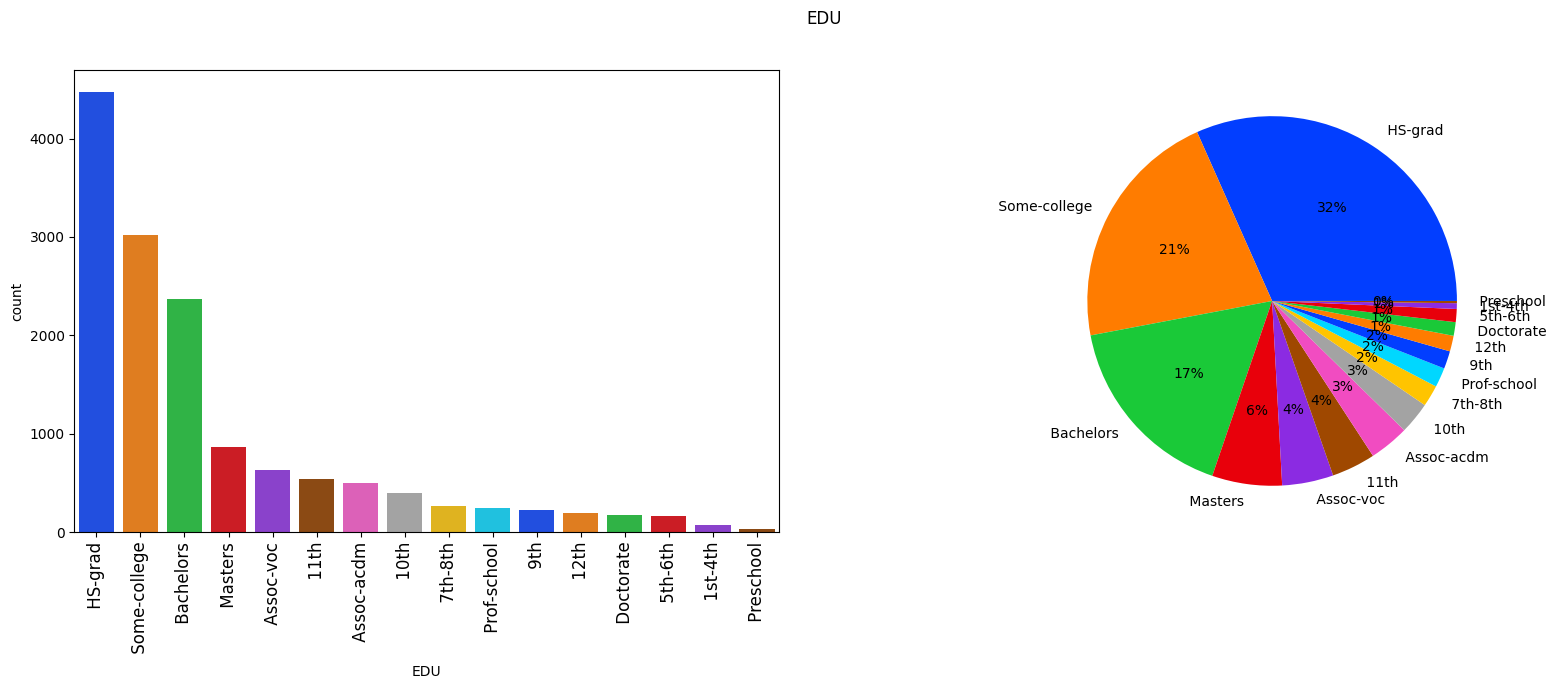

In [440]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='EDU', data=cat_sal_data, palette = palette_color, order=cat_sal_data['EDU'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['EDU'].value_counts().keys().tolist()
counts = cat_sal_data['EDU'].value_counts().tolist()
plt.pie(cat_sal_data['EDU'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('EDU')

plt.show()

The highest education is for High School Graduate followed by Graduction from Some College.

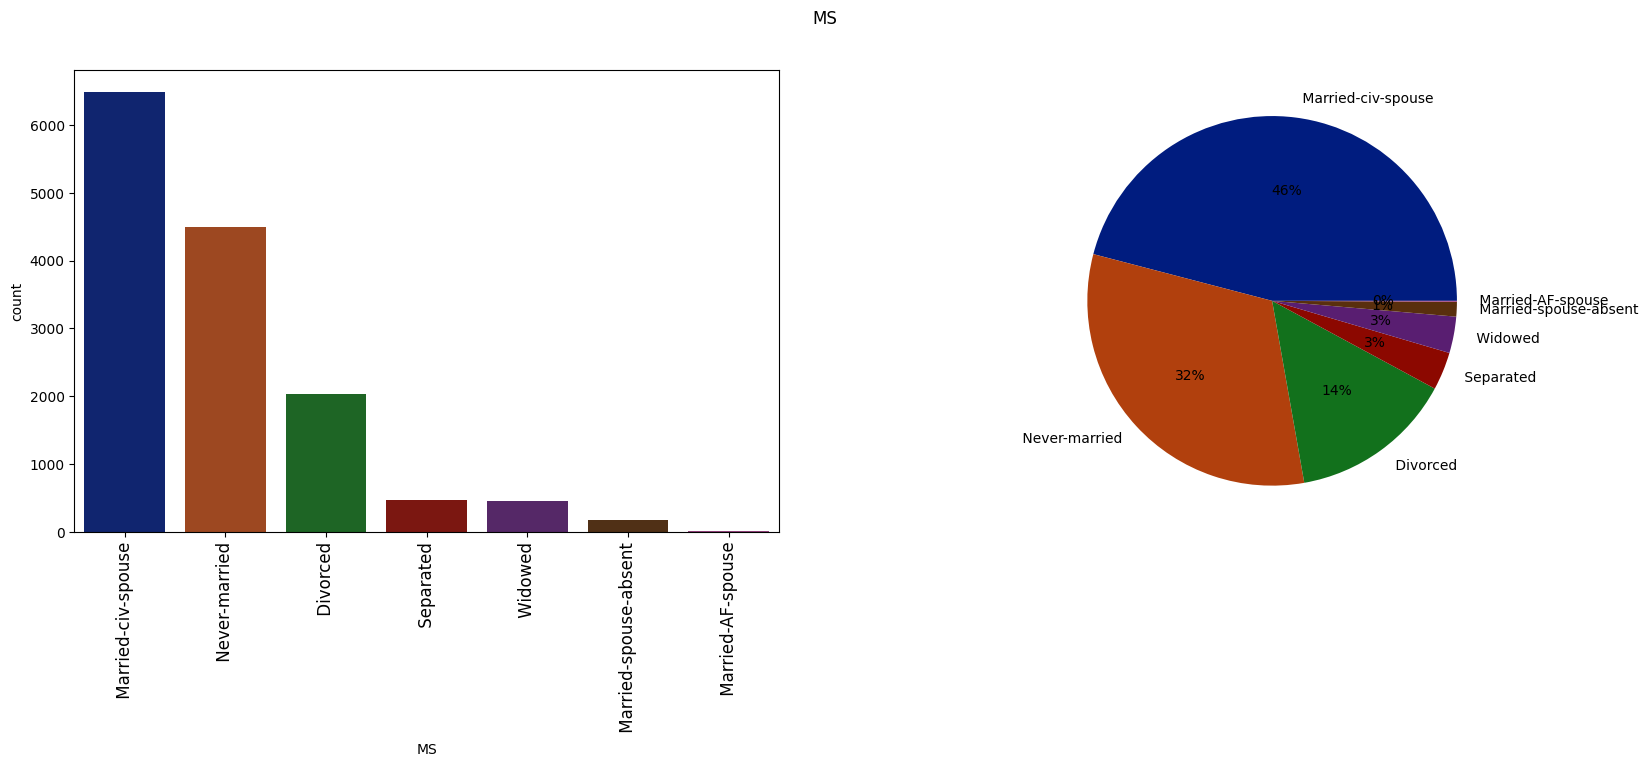

In [441]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('dark')
sns.countplot(x='MS', data=cat_sal_data, palette = palette_color, order=cat_sal_data['MS'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['MS'].value_counts().keys().tolist()
counts = cat_sal_data['MS'].value_counts().tolist()
plt.pie(cat_sal_data['MS'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('MS')

plt.show()

The highest Marital Status is for Married, followed by Never Married

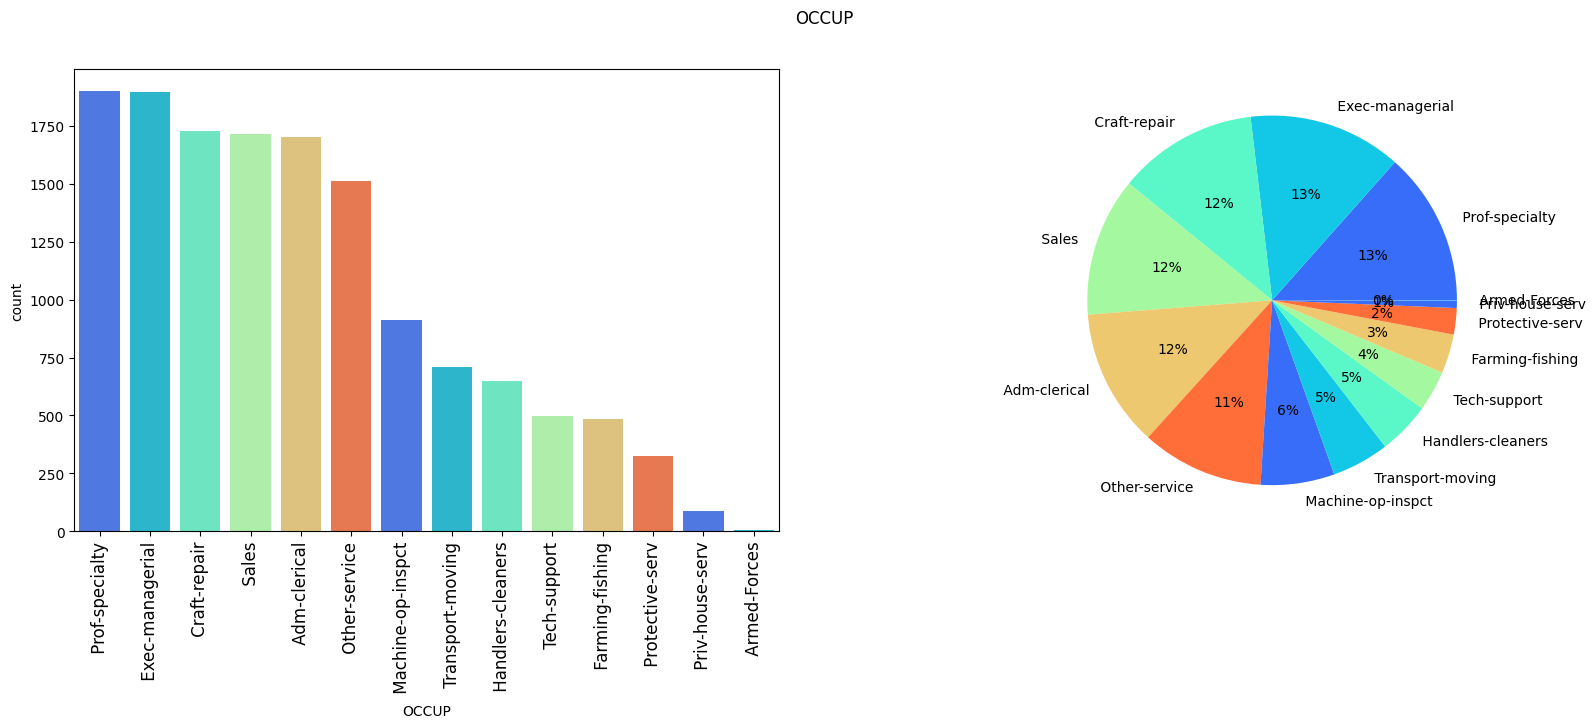

In [442]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='OCCUP', data=cat_sal_data, palette = palette_color, order=cat_sal_data['OCCUP'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['OCCUP'].value_counts().keys().tolist()
counts = cat_sal_data['OCCUP'].value_counts().tolist()
plt.pie(cat_sal_data['OCCUP'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('OCCUP')

plt.show()

The highest occupation is that for 'Professional Speciality' followed by 'Executive Managerial' Postions.

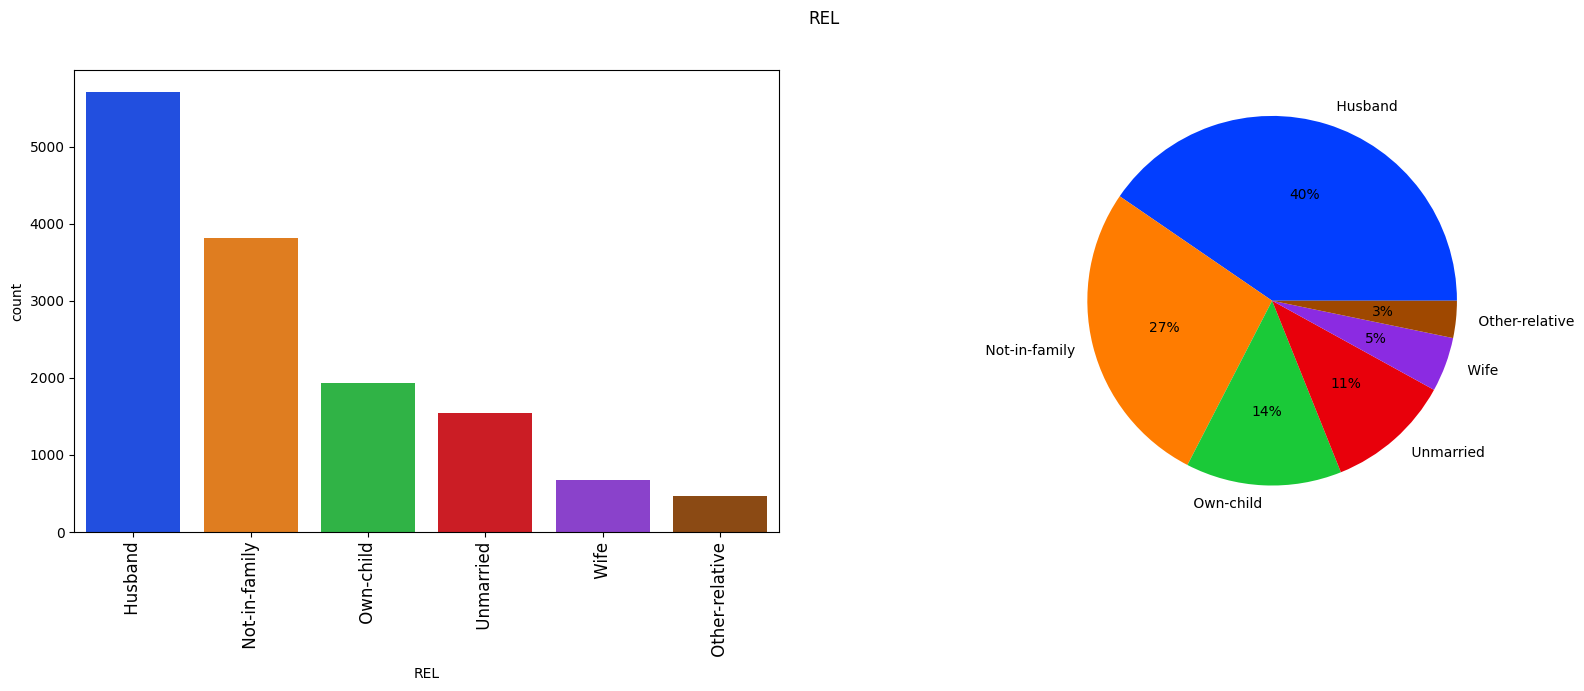

In [443]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='REL', data=cat_sal_data, palette = palette_color, order=cat_sal_data['REL'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['REL'].value_counts().keys().tolist()
counts = cat_sal_data['REL'].value_counts().tolist()
plt.pie(cat_sal_data['REL'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('REL')

plt.show()

Highest relationship is for 'Husbands' followed by 'Not in Family'

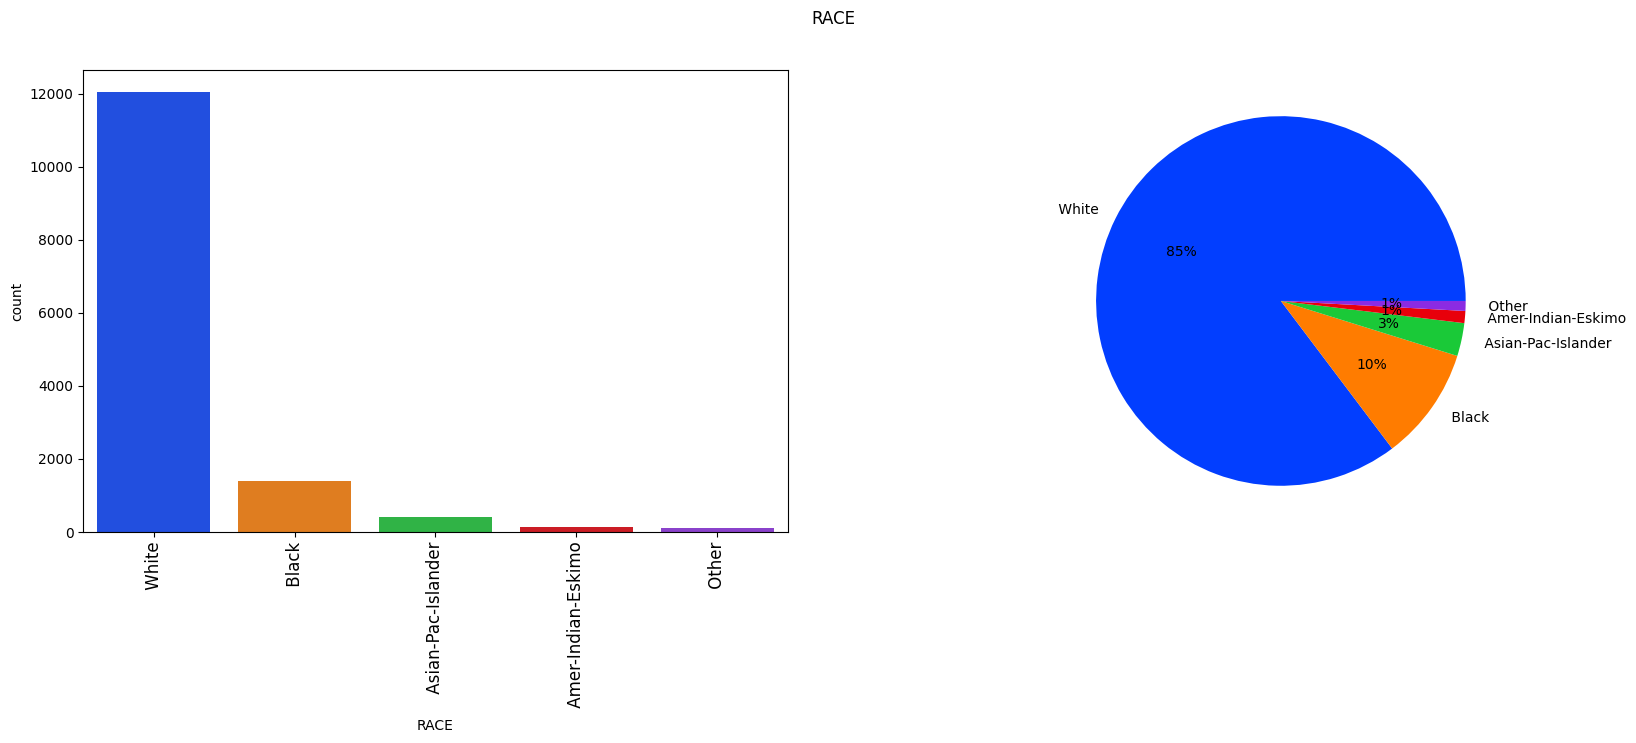

In [444]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='RACE', data=cat_sal_data, palette = palette_color, order=cat_sal_data['RACE'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['RACE'].value_counts().keys().tolist()
counts = cat_sal_data['RACE'].value_counts().tolist()
plt.pie(cat_sal_data['RACE'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('RACE')

plt.show()

The 'White' race is the highest with 85%, followed by blacks with 10%.

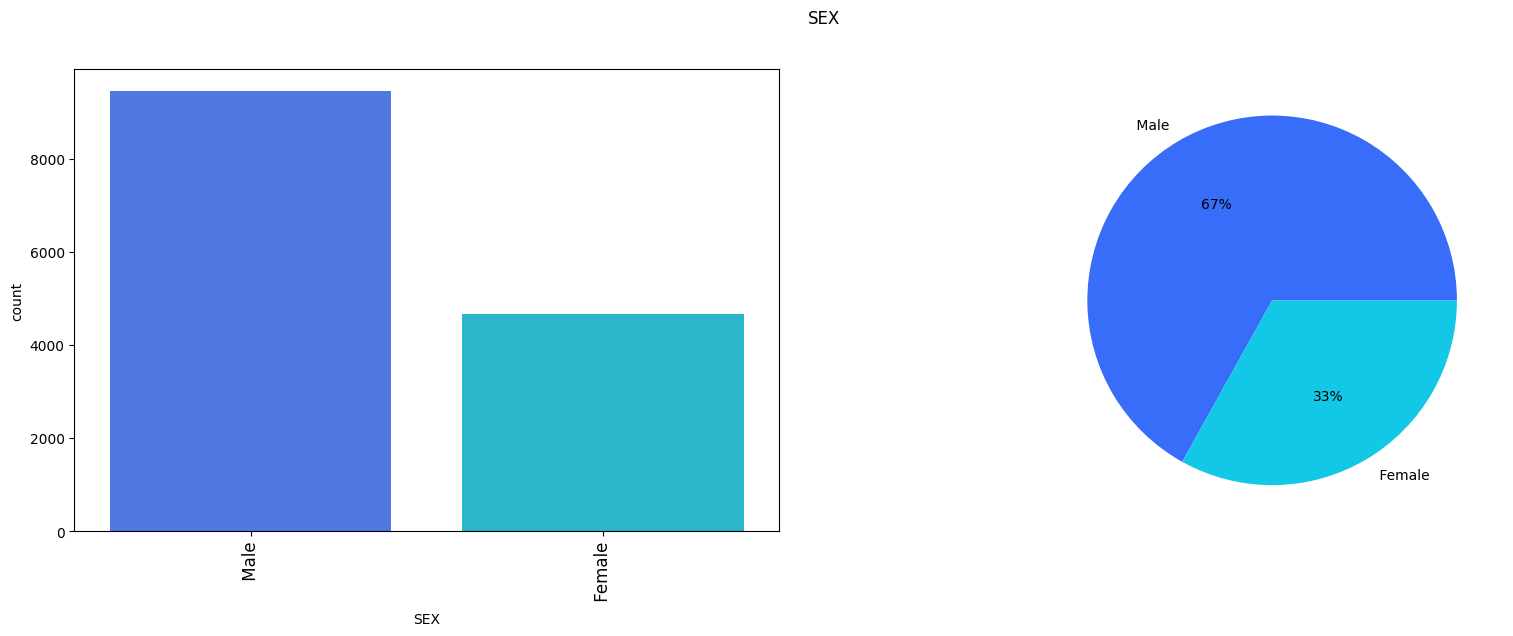

In [445]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('rainbow')
sns.countplot(x='SEX', data=cat_sal_data, palette = palette_color, order=cat_sal_data['SEX'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['SEX'].value_counts().keys().tolist()
counts = cat_sal_data['SEX'].value_counts().tolist()
plt.pie(cat_sal_data['SEX'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('SEX')

plt.show()

Majority of data is pertaining to Male employees with 67%

Text(0.5, 1.0, 'NATIVE')

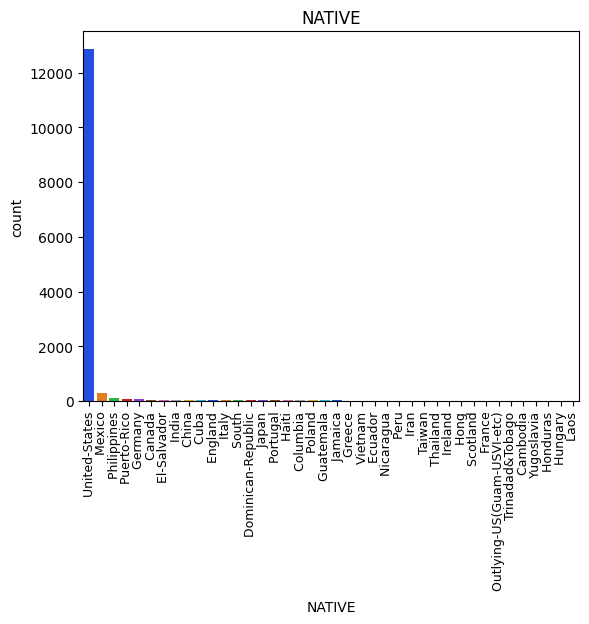

In [446]:
palette_color = sns.color_palette('bright')
sns.countplot(x='NATIVE', data=cat_sal_data, palette = palette_color, order=cat_sal_data['NATIVE'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 9)
plt.title('NATIVE')

The data is mostly concerned with United States employees i.e., > 12K, followed by Mexico, which is lesser than 200.

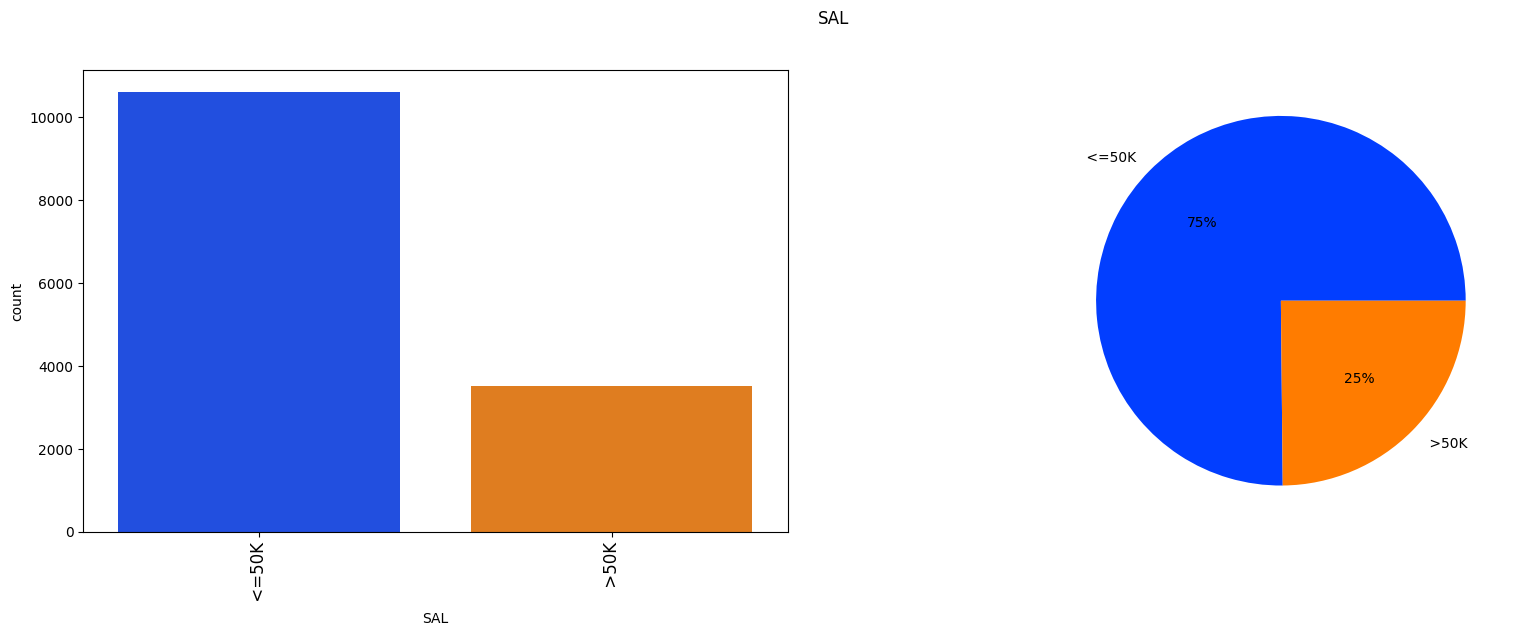

In [447]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')
sns.countplot(x='SAL', data=cat_sal_data, palette = palette_color, order=cat_sal_data['SAL'].value_counts().index )
plt.xticks(rotation = 90,fontsize = 12)

# Display state data in a form of Pie Graph
plt.subplot(1,2,2)
values = cat_sal_data['SAL'].value_counts().keys().tolist()
counts = cat_sal_data['SAL'].value_counts().tolist()
plt.pie(cat_sal_data['SAL'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')

plt.suptitle('SAL')

plt.show()

The proportion of salaries <=50K is 3 times more i.e., 75% when compared to salaries > 50K

### **Label Encoding** ###

In [448]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

for col in cat_sal_data:
  salary_data[col]= label_encoder.fit_transform(salary_data[col])

In [449]:
salary_data.head()

AGE  WCLASS  EDU  EDU_NO  MS  OCCUP  REL  RACE  SEX  CAP_GAIN  CAP_LOSS  \
0   25       2    1       7   4      6    3     2    1         0         0   
1   38       2   11       9   2      4    0     4    1         0         0   
2   28       1    7      12   2     10    0     4    1         0         0   
3   44       2   15      10   2      6    0     2    1      7688         0   
4   34       2    0       6   4      7    1     4    1         0         0   

   HPW  NATIVE  SAL  
0   40      37    0  
1   50      37    0  
2   40      37    1  
3   40      37    1  
4   30      37    0

In [450]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14130 entries, 0 to 14129
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   AGE       14130 non-null  int64
 1   WCLASS    14130 non-null  int32
 2   EDU       14130 non-null  int32
 3   EDU_NO    14130 non-null  int64
 4   MS        14130 non-null  int32
 5   OCCUP     14130 non-null  int32
 6   REL       14130 non-null  int32
 7   RACE      14130 non-null  int32
 8   SEX       14130 non-null  int32
 9   CAP_GAIN  14130 non-null  int64
 10  CAP_LOSS  14130 non-null  int64
 11  HPW       14130 non-null  int64
 12  NATIVE    14130 non-null  int32
 13  SAL       14130 non-null  int32
dtypes: int32(9), int64(5)
memory usage: 1.0 MB


In [451]:
salary_data.shape

(14130, 14)

### **Correlation Matrix** ###

In [452]:
salary_data.corr()

# Based on the Correlation Matrix, we don't see any major correlation between any of the independent numerical variables.
# In other words, we don't see the issue with collinearity problem.

AGE    WCLASS       EDU    EDU_NO        MS     OCCUP  \
AGE       1.000000  0.092686 -0.004167  0.021979 -0.245822 -0.003881   
WCLASS    0.092686  1.000000  0.021149  0.047708 -0.030821  0.020147   
EDU      -0.004167  0.021149  1.000000  0.361666 -0.044471 -0.017227   
EDU_NO    0.021979  0.047708  0.361666  1.000000 -0.070693  0.093437   
MS       -0.245822 -0.030821 -0.044471 -0.070693  1.000000 -0.001040   
OCCUP    -0.003881  0.020147 -0.017227  0.093437 -0.001040  1.000000   
REL      -0.241180 -0.063257 -0.013293 -0.080444  0.172341 -0.054695   
RACE      0.035180  0.064707  0.007635  0.030924 -0.076084  0.004326   
SEX       0.075150  0.062290 -0.027574  0.000603 -0.114448  0.050982   
CAP_GAIN  0.076765  0.031858  0.030424  0.132346 -0.042549  0.011623   
CAP_LOSS  0.053172  0.007808  0.024271  0.085651 -0.033647  0.012946   
HPW       0.088090  0.051189  0.064155  0.127779 -0.165199  0.014548   
NATIVE    0.001787 -0.000432  0.075685  0.099699 -0.017963  0.003006   
SAL       0.216703  0.011495  0.092476  0.326777 -0.185870  0.046633   

               REL      RACE       SEX  CAP_GAIN  CAP_LOSS       HPW  \
AGE      -0.241180  0.035180  0.075150  0.076765  0.053172  0.088090   
WCLASS   -0.063257  0.064707  0.062290  0.031858  0.007808  0.051189   
EDU      -0.013293  0.007635 -0.027574  0.030424  0.024271  0.064155   
EDU_NO   -0.080444  0.030924  0.000603  0.132346  0.085651  0.127779   
MS        0.172341 -0.076084 -0.114448 -0.042549 -0.033647 -0.165199   
OCCUP    -0.054695  0.004326  0.050982  0.011623  0.012946  0.014548   
REL       1.000000 -0.119236 -0.580247 -0.056609 -0.051241 -0.257082   
RACE     -0.119236  1.000000  0.087171  0.016730  0.020725  0.041720   
SEX      -0.580247  0.087171  1.000000  0.047180  0.048382  0.227884   
CAP_GAIN -0.056609  0.016730  0.047180  1.000000 -0.033929  0.089512   
CAP_LOSS -0.051241  0.020725  0.048382 -0.033929  1.000000  0.056353   
HPW      -0.257082  0.041720  0.227884  0.089512  0.056353  1.000000   
NATIVE    0.003405  0.120543 -0.017165  0.008189  0.002473  0.008654   
SAL      -0.254418  0.073101  0.212100  0.225871  0.147563  0.219184   

            NATIVE       SAL  
AGE       0.001787  0.216703  
WCLASS   -0.000432  0.011495  
EDU       0.075685  0.092476  
EDU_NO    0.099699  0.326777  
MS       -0.017963 -0.185870  
OCCUP     0.003006  0.046633  
REL       0.003405 -0.254418  
RACE      0.120543  0.073101  
SEX      -0.017165  0.212100  
CAP_GAIN  0.008189  0.225871  
CAP_LOSS  0.002473  0.147563  
HPW       0.008654  0.219184  
NATIVE    1.000000  0.016104  
SAL       0.016104  1.000000

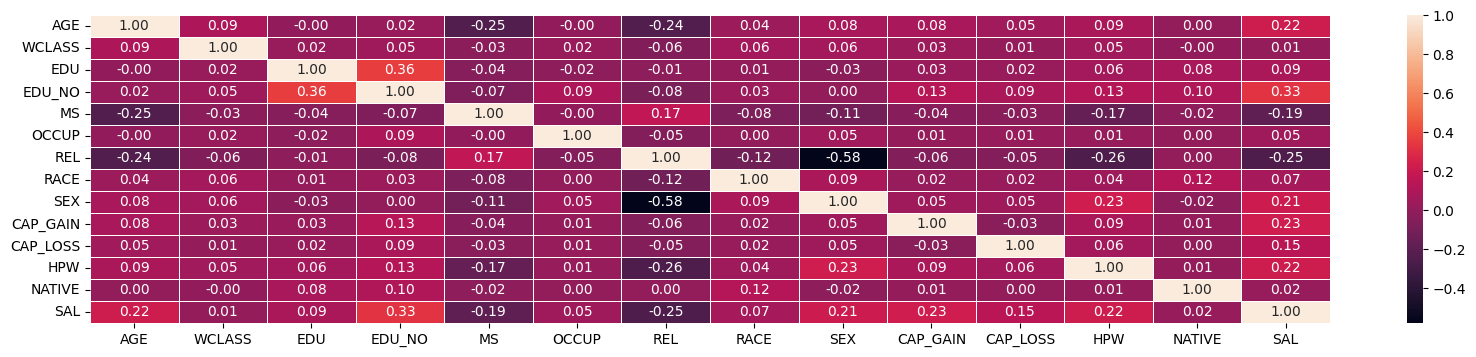

In [453]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(salary_data.corr(), annot=True, linewidths =.5, fmt ='.2f',ax=ax)
plt.show()

- The highest negative correlation is seen between Relationship and Sex
- The second high positive correslation is seen between Education Number and Education
- The third high positive correlation is seen between Education Number and Salary
- The fourth high possitive correslation is seen between Age and Salary

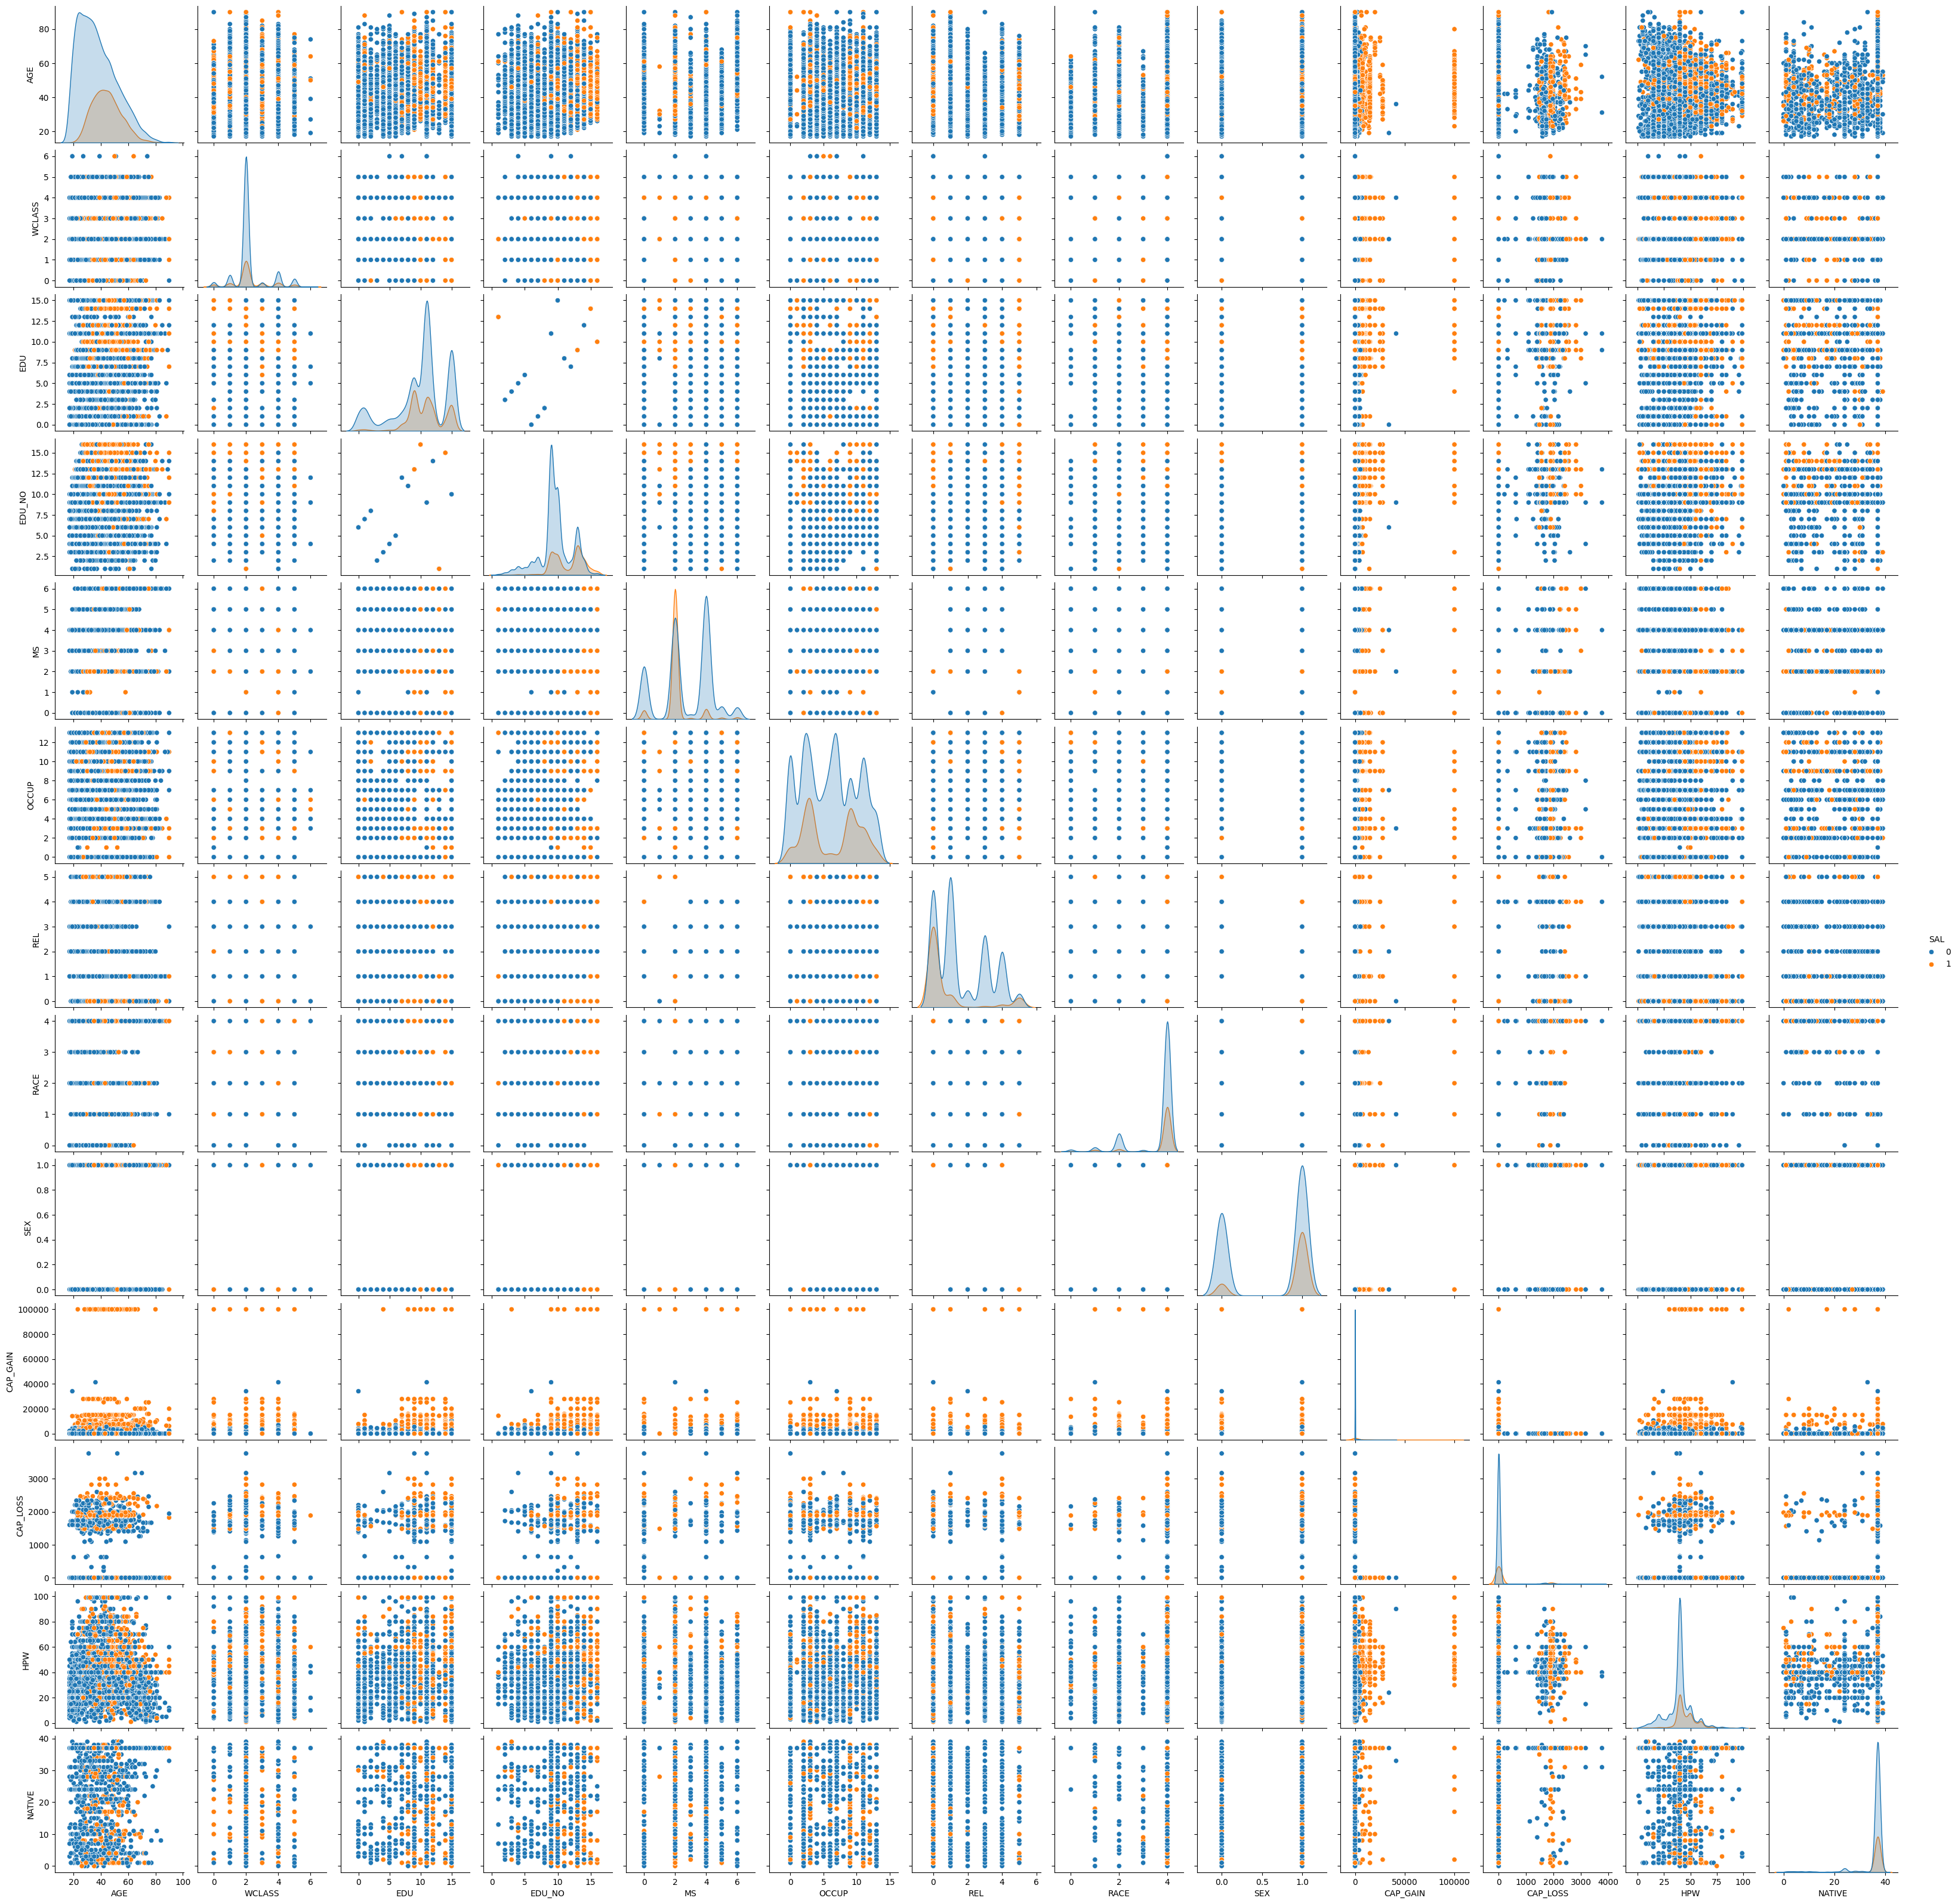

In [454]:
#Format the plot background and scatter plots for all the variables
sns.pairplot(salary_data,hue="SAL")

### ***Categorizing Training and Testing Sets*** ###

In [455]:
salary_data.head()

AGE  WCLASS  EDU  EDU_NO  MS  OCCUP  REL  RACE  SEX  CAP_GAIN  CAP_LOSS  \
0   25       2    1       7   4      6    3     2    1         0         0   
1   38       2   11       9   2      4    0     4    1         0         0   
2   28       1    7      12   2     10    0     4    1         0         0   
3   44       2   15      10   2      6    0     2    1      7688         0   
4   34       2    0       6   4      7    1     4    1         0         0   

   HPW  NATIVE  SAL  
0   40      37    0  
1   50      37    0  
2   40      37    1  
3   40      37    1  
4   30      37    0

In [456]:
salary_data.shape

(14130, 14)

In [457]:
x = salary_data.iloc[:,0:13]  # x is all the columns except the SAL column, which is y
y = salary_data.iloc[:,-1]    # y is the SAL column

# Splitting x and y into training and testing sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


## **Naive Bayes Classification** ##

*Function to get all the details for Accuracy, Classification Report and Confustion Matrix*

In [458]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        classify_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TRAINING RESULT\n**********************************************************\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        classify_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("\n**********************************************************")
        print("                  TESTING RESULT\n**********************************************************\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("\n____________________________________________________________________\n")
        print(f"CLASSIFICATION REPORT:\n{classify_report}")
        print("\n____________________________________________________________________\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

### **1. Categorical Naive Bayes Classifier** ###
The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.

*Training the Model*

In [459]:
# Preparing a Categorical naive bayes model on training data set
from sklearn.naive_bayes import CategoricalNB
cnb_model = CategoricalNB()
cnb_model.fit(x_train, y_train)

print_score(cnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(cnb_model, x_train, y_train, x_test, y_test, train=False)

# Making predictions on the testing set
cnb_y_pred = cnb_model.predict(x_test)
cnb_y_pred



**********************************************************
                  TRAINING RESULT
**********************************************************

Accuracy Score: 85.67%

____________________________________________________________________

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.881704     0.758483  0.856738     0.820094      0.851145
recall        0.934929     0.619649  0.856738     0.777289      0.856738
f1-score      0.907537     0.682073  0.856738     0.794805      0.851621
support    7438.000000  2453.000000  0.856738  9891.000000   9891.000000

____________________________________________________________________

Confusion Matrix: 
 [[6954  484]
 [ 933 1520]]


**********************************************************
                  TESTING RESULT
**********************************************************

Accuracy Score: 84.97%

____________________________________________________________________

array([0, 0, 0, ..., 0, 0, 0])

*Checking accuracy using Metrics*

In [460]:
# Checking accuracy by comparing actual response values (y_test) with predicted
# Response values (cnb_y_pred)
from sklearn import metrics
cnb_score = metrics.accuracy_score(y_test, cnb_y_pred)
print("Accuracy using metrics:", cnb_score)

Accuracy using metrics: 0.8497287096013211


*Checking accuracy using Alternate Method*

In [461]:
# Checking accuracy using alternate method
cnb_score_alt = cnb_model.score(x_test, y_test)
print("Accuracy using alternate method:", cnb_score_alt)

Accuracy using alternate method: 0.8497287096013211


### **Confustion Matrix** ###

0.8497287096013211
0.8497287096013211
Both the scores match.


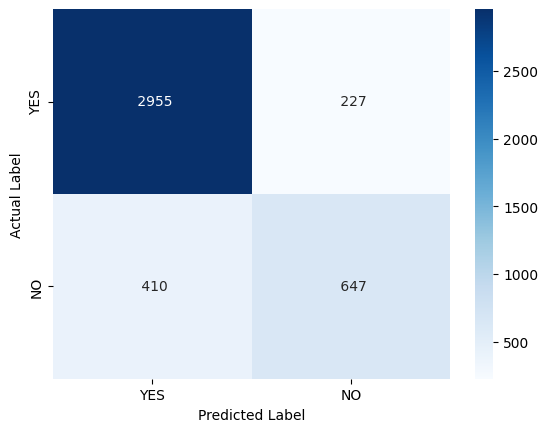

In [462]:
# Confustion Matrix
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Making predictions on the testing set
cnb_y_pred = cnb_model.predict(x_test)
cnb_y_pred

classnames = ['YES','NO']
confusionmatrix = confusion_matrix(y_test,cnb_y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt=' d',cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

C_TP = confusionmatrix[0, 0]
C_TN = confusionmatrix[1, 1]
C_FP = confusionmatrix[0, 1]
C_FN = confusionmatrix[1, 0]

# use float to perform true division, not integer division
print((C_TP + C_TN) / float(C_TP + C_TN + C_FP + C_FN))
print(metrics.accuracy_score(y_test, cnb_y_pred))
print("Both the scores match.")

### ***Basic terminology*** ###

- **True Positives (TP): 2975** - We correctly predicted that they do have Salary >50k
- **True Negatives (TN): 660** - We correctly predicted that they don't have Salary >50k
- **False Positives (FP): 403** - We incorrectly predicted that they do have Salary <50k (a "Type I error")
- **False Negatives (FN): 201** - We incorrectly predicted that they don't have Salary <50k (a "Type II error")

### **Making predictions using new data** ###

In [463]:
cnb_model.predict([[75,1,7,10,4,7,1,4,1,5000,0,30,37]])[0]

0

This gives array([1]) as output. 1 here means Salary greater than 50K (Salary >=50K).

In [464]:
cnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37]])[0]

0

This gives array([0]) as output. 0 here means Salary lesser than 50K (Salary <50K).

In [465]:
# We can also give multiple inputs simultaneously as shown below
cnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37], [75,1,7,10,4,7,1,4,1,5000,0,30,37],[55,1,6,9,4,7,1,4,1,1000,0,30,37]]) # Giving 3 inputs at once

array([0, 0, 0])

- Here the first output 0 (Salary <= 50K) is for the dataset [27,2,2,1,1,4,2,1,1,0,800,40,37].
- The second output 0 (Salary <= 50K) is for the dataset [75,1,7,10,4,7,1,4,1,5000,0,30,37]
- The third and last output 0 (Salary <= 50K) is for the third dataset [55,1,6,9,4,7,1,4,1,1000,0,30,37]

*Model performance on Testing data*

### **2. Gaussian Naive Bayes Classifier** ###

In 'Gaussian Naive Bayes Classifier', continous values associated with each feature are assumed to be distributed according to a Gaussian distribution (Also called Normal Distribution). When plotted it gives a bell-shaped curve.

*Training the Model*

In [466]:
# Gaussian Naive Bayes classification - spam filter
# The Gaussian Naive Bayes Classifier is best where the data contains continuous values
# Training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

print_score(gnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(gnb_model, x_train, y_train, x_test, y_test, train=False)

# Making predictions on the testing set
gnb_y_pred = gnb_model.predict(x_test)
gnb_y_pred


**********************************************************
                  TRAINING RESULT
**********************************************************

Accuracy Score: 79.30%

____________________________________________________________________

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.810291     0.668605  0.793044     0.739448      0.775153
recall        0.946357     0.328170  0.793044     0.637263      0.793044
f1-score      0.873054     0.440252  0.793044     0.656653      0.765718
support    7438.000000  2453.000000  0.793044  9891.000000   9891.000000

____________________________________________________________________

Confusion Matrix: 
 [[7039  399]
 [1648  805]]


**********************************************************
                  TESTING RESULT
**********************************************************

Accuracy Score: 79.10%

____________________________________________________________________

array([0, 0, 0, ..., 0, 0, 0])

*Checking accuracy using Metrics*

In [467]:
# Checking accuracy by comparing actual response values (y_test) with predicted
# response values (y_pred)
from sklearn import metrics
score = metrics.accuracy_score(y_test, gnb_y_pred)
print("Accuracy using metrics:", score)

Accuracy using metrics: 0.7909884406699693


*Checking accuracy using Alternate Method*

In [468]:
# Checking accuracy using alternate method
gnb_score_alt = gnb_model.score(x_test, y_test)
print("Accuracy using alternate method:", gnb_score_alt)

Accuracy using alternate method: 0.7909884406699693


### **Confustion Matrix** ###

0.7909884406699693
0.7909884406699693
Both the scores match.


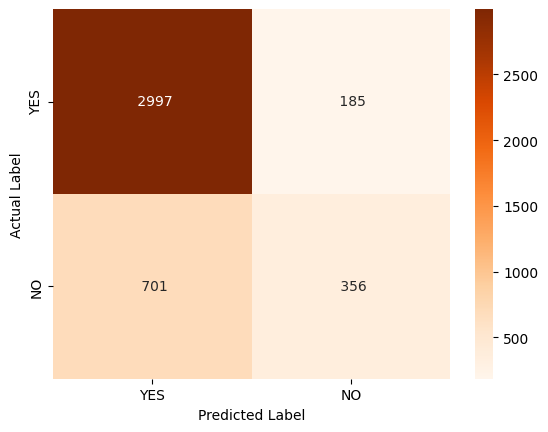

In [469]:
# Confustion Matrix
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Making predictions on the testing set
gnb_y_pred = gnb_model.predict(x_test)
gnb_y_pred

classnames = ['YES','NO']
confusionmatrix = confusion_matrix(y_test,gnb_y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt=' d',cmap="Oranges")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

G_TP = confusionmatrix[0, 0]
G_TN = confusionmatrix[1, 1]
G_FP = confusionmatrix[0, 1]
G_FN = confusionmatrix[1, 0]

# use float to perform true division, not integer division
print((G_TP + G_TN) / float(G_TP + G_TN + G_FP + G_FN))
print(metrics.accuracy_score(y_test, gnb_y_pred))
print("Both the scores match.")

### ***Basic terminology*** ###

- **True Positives (TP): 3020** - We correctly predicted that they do have Salary >50k
- **True Negatives (TN): 356** - We correctly predicted that they don't have Salary >50k
- **False Positives (FP): 707** - We incorrectly predicted that they do have Salary <50k (a "Type I error")
- **False Negatives (FN): 156** - We incorrectly predicted that they don't have Salary <50k (a "Type II error")

### **Making predictions using new data** ###

*Making predictions using new data*

In [470]:
gnb_model.predict([[75,1,7,10,4,7,1,4,1,5000,0,30,37]])[0]

1

This gives array([1]) as output. 1 here means Salary greater than 50K (Salary >=50K).

In [471]:
gnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37]])[0]

0

This gives array([0]) as output. 0 here means Salary lesser than 50K (Salary <50K).

In [472]:
# We can also give multiple inputs simultaneously as shown below
gnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37], [75,1,7,10,4,7,1,4,1,5000,0,30,37],[55,1,6,9,4,7,1,4,1,1000,0,30,37]]) # Giving 3 inputs at once

array([0, 1, 0])

- Here the first output 0 (Salary <= 50K) is for the dataset [27,2,2,1,1,4,2,1,1,0,800,40,37].
- The second output 1 (Salary > 50K) is for the dataset [75,1,7,10,4,7,1,4,1,5000,0,30,37]
- The third and last output 0 (Salary <= 50K) is for the third dataset [55,1,6,9,4,7,1,4,1,1000,0,30,37]

### **3. Multinomial Naive Bayes Classifier** ###

Sometimes, we do not have continous values. We will have some text and there may be certain words repeated. That means the frequencies of certain words may be high. Based on such frequencies, we are can categorize the data. Multinomial means several words. This is best used for classification of text data such as messages categorization into spam or ham.

In [473]:
# Multinomial Naive Bayes classification - spam filter
# Training the model on training set
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)

print_score(mnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(mnb_model, x_train, y_train, x_test, y_test, train=False)

# Making predictions on the testing set
mnb_y_pred = mnb_model.predict(x_test)
mnb_y_pred


**********************************************************
                  TRAINING RESULT
**********************************************************

Accuracy Score: 77.28%

____________________________________________________________________

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.787973     0.617312  0.772824     0.702643      0.745648
recall        0.954827     0.220954  0.772824     0.587890      0.772824
f1-score      0.863413     0.325428  0.772824     0.594420      0.729991
support    7438.000000  2453.000000  0.772824  9891.000000   9891.000000

____________________________________________________________________

Confusion Matrix: 
 [[7102  336]
 [1911  542]]


**********************************************************
                  TESTING RESULT
**********************************************************

Accuracy Score: 77.47%

____________________________________________________________________

array([0, 0, 0, ..., 0, 0, 0])

*Checking accuracy using Metrics*

In [474]:
# Checking accuracy by comparing actual response values (y_test) with predicted
# response values (y_pred)
from sklearn import metrics
mnb_score = metrics.accuracy_score(y_test, mnb_y_pred)
print("Accuracy using metrics:", mnb_score)

Accuracy using metrics: 0.7747110167492333


*Checking accuracy using Alternate Method*

In [475]:
# Checking accuracy using alternate method
mnb_score_alt = mnb_model.score(x_test, y_test)
print("Accuracy using alternate method:", mnb_score_alt)

Accuracy using alternate method: 0.7747110167492333


0.7747110167492333
0.7747110167492333
Both the scores match.


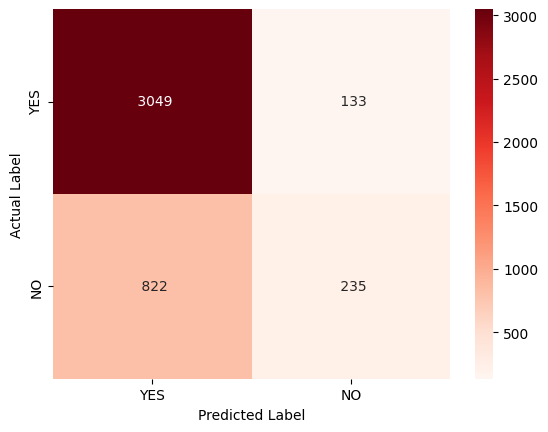

In [476]:
### **Confustion Matrix** ###

# Confustion Matrix
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Making predictions on the testing set
mnb_y_pred = mnb_model.predict(x_test)
mnb_y_pred

classnames = ['YES','NO']
confusionmatrix = confusion_matrix(y_test,mnb_y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt=' d',cmap="Reds")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

M_TP = confusionmatrix[0, 0]
M_TN = confusionmatrix[1, 1]
M_FP = confusionmatrix[0, 1]
M_FN = confusionmatrix[1, 0]

# use float to perform true division, not integer division
print((M_TP + M_TN) / float(M_TP + M_TN + M_FP + M_FN))
print(metrics.accuracy_score(y_test, mnb_y_pred))
print("Both the scores match.")

### ***Basic terminology*** ###

- **True Positives (TP): 3057** - We correctly predicted that they do have Salary >50k
- **True Negatives (TN): 239** - We correctly predicted that they don't have Salary >50k
- **False Positives (FP): 824** - We incorrectly predicted that they do have Salary <50k (a "Type I error")
- **False Negatives (FN): 119** - We incorrectly predicted that they don't have Salary <50k (a "Type II error")

### **Making predictions using new data** ###

In [477]:
mnb_model.predict([[75,1,7,10,4,7,1,4,1,5000,0,30,37]])[0]

1

This gives array([1]) as output. 1 here means Salary greater than 50K (Salary >=50K).

In [478]:
mnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37]])[0]

0

This gives array([0]) as output. 0 here means Salary lesser than 50K (Salary <50K).

In [479]:
# We can also give multiple inputs simultaneously as shown below
mnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37], [75,1,7,10,4,7,1,4,1,5000,0,30,37],[55,1,6,9,4,7,1,4,1,1000,0,30,37]]) # Giving 3 inputs at once

array([0, 1, 1])

- Here the first output 0 (Salary <= 50K) is for the dataset [27,2,2,1,1,4,2,1,1,0,800,40,37].
- The second output 1 (Salary > 50K) is for the dataset [75,1,7,10,4,7,1,4,1,5000,0,30,37]
- The third and last output 1 (Salary > 50K) is for the third dataset [55,1,6,9,4,7,1,4,1,1000,0,30,37]

### **4. Bernoulli Naive Bayes Classifier** ###
Bernoulli Naive Bayes is one of the variants of the Naive Bayes algorithm in machine learning. It is very useful to be used when the dataset is in a binary distribution where the output label is either present or absent. 

In [480]:
# Bernoulli Naive Bayes classification
# Training the model on training set
from sklearn.naive_bayes import BernoulliNB
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)

print_score(bnb_model, x_train, y_train, x_test, y_test, train=True)
print_score(bnb_model, x_train, y_train, x_test, y_test, train=False)

# Making predictions on the testing set
bnb_y_pred = bnb_model.predict(x_test)
bnb_y_pred


**********************************************************
                  TRAINING RESULT
**********************************************************

Accuracy Score: 73.46%

____________________________________________________________________

CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.890349     0.476919  0.734607     0.683634      0.787817
recall        0.737967     0.724419  0.734607     0.731193      0.734607
f1-score      0.807028     0.575174  0.734607     0.691101      0.749527
support    7438.000000  2453.000000  0.734607  9891.000000   9891.000000

____________________________________________________________________

Confusion Matrix: 
 [[5489 1949]
 [ 676 1777]]


**********************************************************
                  TESTING RESULT
**********************************************************

Accuracy Score: 72.87%

____________________________________________________________________

array([0, 1, 0, ..., 0, 0, 0])

*Checking accuracy using Metrics*

In [481]:
# Checking accuracy by comparing actual response values (y_test) with predicted
# response values (y_pred)
from sklearn import metrics
bnb_score = metrics.accuracy_score(y_test, bnb_y_pred)
print("Accuracy using metrics:", bnb_score)

Accuracy using metrics: 0.7287096013210663


*Checking accuracy using Alternate Method*

In [482]:
# Checking accuracy using alternate method
bnb_score_alt = bnb_model.score(x_test, y_test)
print("Accuracy using alternate method:", bnb_score_alt)

Accuracy using alternate method: 0.7287096013210663


### **Confustion Matrix** ###

0.7287096013210663
0.7287096013210663
Both the scores match.


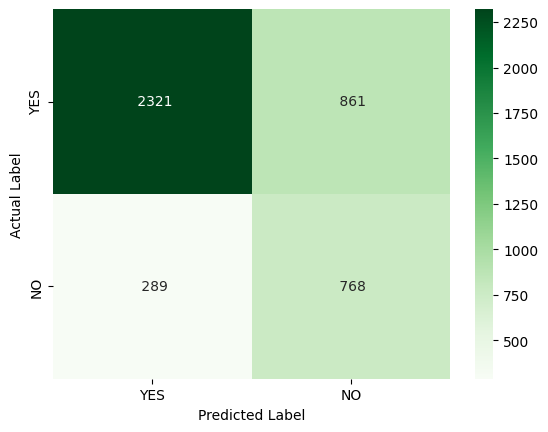

In [483]:
# Confustion Matrix
import matplotlib.pyplot as plt
import numpy
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Making predictions on the testing set
bnb_y_pred = bnb_model.predict(x_test)
bnb_y_pred

classnames = ['YES','NO']
confusionmatrix = confusion_matrix(y_test,bnb_y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt=' d',cmap="Greens")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

B_TP = confusionmatrix[0, 0]
B_TN = confusionmatrix[1, 1]
B_FP = confusionmatrix[0, 1]
B_FN = confusionmatrix[1, 0]

# use float to perform true division, not integer division
print((B_TP + B_TN) / float(B_TP + B_TN + B_FP + B_FN))
print(metrics.accuracy_score(y_test, bnb_y_pred))
print("Both the scores match.")

### ***Basic terminology*** ###

- **True Positives (TP): 2337** - We correctly predicted that they do have Salary >50k
- **True Negatives (TN): 780** - We correctly predicted that they don't have Salary >50k
- **False Positives (FP): 283** - We incorrectly predicted that they do have Salary <50k (a "Type I error")
- **False Negatives (FN): 839** - We incorrectly predicted that they don't have Salary <50k (a "Type II error")

### **Making predictions using new data** ###

In [484]:
bnb_model.predict([[75,1,7,10,4,7,1,4,1,5000,0,30,37]])[0]

0

This gives array([0]) as output. 0 here means Salary greater than 50K (Salary <= 50K).

In [485]:
bnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37]])[0]

0

This gives array([0]) as output. 0 here means Salary greater than 50K (Salary <= 50K).

In [486]:
# We can also give multiple inputs simultaneously as shown below
bnb_model.predict([[27,2,2,1,1,4,2,1,1,0,800,40,37], [75,1,7,10,4,7,1,4,1,5000,0,30,37],[55,1,6,9,4,7,1,4,1,1000,0,30,37]]) # Giving 3 inputs at once

array([0, 0, 0])

- Here the first output 0 (Salary <= 50K) is for the dataset [27,2,2,1,1,4,2,1,1,0,800,40,37].
- The second output 0 (Salary <= 50K) is for the dataset [75,1,7,10,4,7,1,4,1,5000,0,30,37]
- The third and last output 0 (Salary <= 50K) is for the third dataset [55,1,6,9,4,7,1,4,1,1000,0,30,37]

### **INFERENCE** ###
- The **Categorical Naive Bayes** gives us **First Best** Accuracy which is about **85%** for the Salary Data that we have processed.
- The **Gaussian Naive Bayes Classifier** gives us **Second Best** Accuracy which is about **79%** for the Salary Data that we have processed.
- The **Multinomial Naive Bayes Classifier** gives us **Third Best** Accuracy which is about **78%** for the Salary Data that we have processed.
- The **Bernoulli Naive Bayes Classifier** gives us **Fourth Best** Accuracy which is about **74%** for the Salary Data that we have processed.